In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 12})

import os
import sys
import glob
from itertools import cycle

import numpy as np
import pandas as pd

from os.path import join

import seaborn as sns

import mdtraj as md
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform

import pyemma

import random

from os.path import join

from collections import OrderedDict
from collections import defaultdict


print("Python version:\n{}\n".format(sys.version))
print("matplotlib version: {}".format(matplotlib.__version__))
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

Python version:
3.6.8 |Anaconda custom (64-bit)| (default, Dec 30 2018, 01:22:34) 
[GCC 7.3.0]

matplotlib version: 3.1.0
pandas version: 0.24.2
numpy version: 1.16.4
seaborn version: 0.9.0


In [2]:
indir = './Trajectories_all'
topfile =  indir+'/open10_dry.parm7'
from glob import glob
traj_list = glob(indir+'/*.nc')

In [3]:
ref1 = md.load('./Trajectories_all/open10_dry.rst7', top='./Trajectories_all/open10_dry.parm7')
ref2 = md.load('./Trajectories_all/closed10_dry.rst7', top='./Trajectories_all/closed10_dry.parm7')

In [5]:
feat = pyemma.coordinates.featurizer(topfile)
feat.add_minrmsd_to_ref(ref1)
feat.add_minrmsd_to_ref(ref2)
feat.describe()

['minrmsd to frame 0 of <mdtraj.Trajectory with 1 frames, 2808 atoms, 192 residues, and unitcells at 0x7f8850b090b8>',
 'minrmsd to frame 0 of <mdtraj.Trajectory with 1 frames, 2808 atoms, 192 residues, and unitcells at 0x7f885038f080>']

In [6]:
feat.dimension()

2

In [7]:
inp = pyemma.coordinates.source(traj_list, feat)

In [8]:
inp[:, 0]

TypeError: 'FeatureReader' object is not subscriptable

In [9]:
pyemma.plots.plot_free_energy(np.concatenate(inp)[:, 0], np.concatenate(inp)[:, 1])
plt.xlabel('RMSD to Open') 
plt.ylabel('RMSD to Closed');

TypeError: The first input argument needs to be a sequence

In [10]:
print('number of trajectories =',inp.number_of_trajectories())
print('trajectory length =',inp.trajectory_length(0),'frames')
print('trajectory time =',(inp.trajectory_length(0)*50/1000),'ns')
print('trajectory time step =',(inp.trajectory_length(0)*50)/inp.trajectory_length(0),'ps')
print('number of dimension =',inp.dimension())

S=0
for i in range(0, inp.number_of_trajectories()):
    #print(inp.trajectory_length(i))
    S += inp.trajectory_length(i)
S*=50/1000000
print('total simulated time =',S,'μs')

number of trajectories = 20
trajectory length = 10200 frames
trajectory time = 510.0 ns
trajectory time step = 50.0 ps
number of dimension = 2
total simulated time = 24.76555 μs


In [11]:
tica_obj = pyemma.coordinates.tica(data=inp, lag=20, var_cutoff=1)
print('TICA dimension ', tica_obj.dimension())

TICA dimension  2


In [11]:
tica_obj.cumvar

array([ 0.58780609,  1.        ])

In [12]:
Y = tica_obj.get_output()

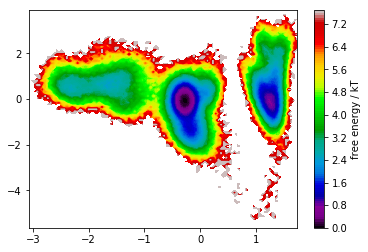

In [13]:
pyemma.plots.plot_free_energy(np.vstack(Y)[:, 0], np.vstack(Y)[:, 1]);

In [14]:
n_clusters = 10 

In [15]:
clustering = pyemma.coordinates.cluster_kmeans(Y,k=n_clusters,max_iter=1000)

29-06-18 14:52:50 pyemma.coordinates.clustering.kmeans.KmeansClustering[3] INFO     Cluster centers converged after 14 steps.


In [31]:
#dtrajs = clustering.dtrajs

In [16]:
def plot_labels(ax=None):
    #if ax is None:
        #ax = gca()
    for i in range(0,len(clustering.clustercenters)):
        plt.text(clustering.clustercenters[i][0]+0.05, clustering.clustercenters[i][1]+0.05, 
                 i, fontsize=10, color='black')

<Figure size 432x288 with 0 Axes>

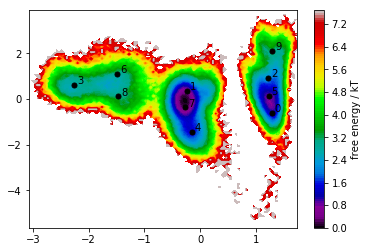

In [17]:
plt.figure()
pyemma.plots.plot_free_energy(np.vstack(Y)[:, 0], np.vstack(Y)[:, 1])
cc_x = clustering.clustercenters[:, 0]
cc_y = clustering.clustercenters[:, 1]
plt.plot(cc_x, cc_y, linewidth=0, marker='o', markersize=5, color='black')
plot_labels()

In [19]:
for i in range(0,10):
    print(len(clustering.dtrajs[i]))

40200
40200
39091
40200
40200
40200
40200
40200
37620
40200


In [20]:
np.concatenate(clustering.dtrajs)

array([3, 3, 3, ..., 9, 9, 9], dtype=int32)

In [21]:
len(np.concatenate(clustering.dtrajs))

398311

In [22]:
labels = np.concatenate(clustering.dtrajs)
for i, label in enumerate(labels):
    print(i,label)

0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 3
8 3
9 3
10 3
11 3
12 3
13 3
14 3
15 3
16 3
17 3
18 3
19 8
20 3
21 3
22 3
23 3
24 3
25 3
26 3
27 3
28 3
29 8
30 3
31 8
32 3
33 3
34 3
35 3
36 3
37 8
38 3
39 3
40 8
41 3
42 3
43 3
44 3
45 3
46 3
47 3
48 3
49 3
50 3
51 3
52 8
53 3
54 3
55 3
56 3
57 3
58 3
59 3
60 3
61 3
62 3
63 3
64 8
65 3
66 3
67 3
68 3
69 3
70 8
71 3
72 3
73 3
74 3
75 3
76 3
77 3
78 3
79 3
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 3
89 3
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 3
100 3
101 3
102 3
103 3
104 3
105 3
106 3
107 3
108 8
109 3
110 3
111 3
112 3
113 3
114 3
115 3
116 3
117 3
118 3
119 3
120 3
121 3
122 3
123 3
124 3
125 3
126 3
127 3
128 3
129 3
130 3
131 3
132 3
133 3
134 3
135 3
136 3
137 3
138 3
139 3
140 3
141 3
142 3
143 3
144 3
145 3
146 3
147 3
148 3
149 3
150 3
151 3
152 3
153 3
154 3
155 3
156 3
157 3
158 3
159 3
160 3
161 3
162 3
163 3
164 3
165 3
166 3
167 3
168 3
169 3
170 3
171 3
172 3
173 3
174 3
175 3
176 3
177 3
178 3
179 3
180 3
181 3
182 3
183 3
184 3


2588 1
2589 1
2590 1
2591 1
2592 1
2593 1
2594 1
2595 1
2596 7
2597 7
2598 7
2599 7
2600 7
2601 1
2602 1
2603 7
2604 1
2605 1
2606 1
2607 1
2608 7
2609 7
2610 7
2611 1
2612 1
2613 1
2614 7
2615 7
2616 7
2617 7
2618 7
2619 7
2620 7
2621 7
2622 1
2623 1
2624 1
2625 1
2626 1
2627 1
2628 7
2629 1
2630 7
2631 1
2632 1
2633 7
2634 7
2635 1
2636 7
2637 1
2638 1
2639 1
2640 7
2641 1
2642 1
2643 1
2644 1
2645 1
2646 1
2647 1
2648 1
2649 1
2650 1
2651 1
2652 1
2653 1
2654 1
2655 1
2656 1
2657 7
2658 7
2659 1
2660 1
2661 7
2662 7
2663 7
2664 7
2665 7
2666 1
2667 7
2668 7
2669 7
2670 7
2671 7
2672 7
2673 7
2674 7
2675 7
2676 7
2677 7
2678 7
2679 7
2680 7
2681 7
2682 1
2683 1
2684 1
2685 7
2686 7
2687 1
2688 7
2689 7
2690 1
2691 1
2692 7
2693 1
2694 1
2695 1
2696 1
2697 1
2698 1
2699 1
2700 7
2701 7
2702 7
2703 7
2704 7
2705 7
2706 7
2707 7
2708 1
2709 1
2710 7
2711 1
2712 1
2713 1
2714 1
2715 7
2716 7
2717 7
2718 7
2719 1
2720 1
2721 7
2722 7
2723 7
2724 7
2725 7
2726 7
2727 7
2728 7
2729 7
2730 7

5087 1
5088 1
5089 1
5090 7
5091 1
5092 7
5093 7
5094 7
5095 1
5096 1
5097 1
5098 1
5099 7
5100 1
5101 7
5102 7
5103 7
5104 7
5105 7
5106 7
5107 7
5108 7
5109 7
5110 7
5111 7
5112 7
5113 7
5114 7
5115 7
5116 7
5117 7
5118 7
5119 7
5120 7
5121 7
5122 7
5123 7
5124 7
5125 7
5126 7
5127 7
5128 7
5129 1
5130 7
5131 7
5132 7
5133 7
5134 1
5135 7
5136 7
5137 7
5138 1
5139 7
5140 7
5141 1
5142 1
5143 1
5144 1
5145 1
5146 1
5147 1
5148 1
5149 1
5150 7
5151 7
5152 7
5153 7
5154 7
5155 7
5156 1
5157 1
5158 1
5159 1
5160 1
5161 7
5162 7
5163 7
5164 7
5165 7
5166 7
5167 7
5168 7
5169 7
5170 7
5171 7
5172 1
5173 1
5174 7
5175 1
5176 7
5177 7
5178 7
5179 7
5180 7
5181 7
5182 7
5183 7
5184 1
5185 7
5186 7
5187 7
5188 7
5189 7
5190 7
5191 7
5192 7
5193 7
5194 7
5195 7
5196 7
5197 7
5198 7
5199 7
5200 1
5201 7
5202 7
5203 7
5204 7
5205 1
5206 7
5207 7
5208 1
5209 7
5210 1
5211 1
5212 7
5213 1
5214 1
5215 1
5216 1
5217 1
5218 1
5219 7
5220 7
5221 1
5222 7
5223 1
5224 1
5225 7
5226 7
5227 7
5228 1
5229 7

6837 7
6838 1
6839 7
6840 1
6841 1
6842 1
6843 1
6844 1
6845 7
6846 7
6847 7
6848 1
6849 1
6850 1
6851 1
6852 1
6853 1
6854 1
6855 1
6856 1
6857 1
6858 1
6859 1
6860 1
6861 1
6862 1
6863 7
6864 7
6865 7
6866 7
6867 7
6868 1
6869 7
6870 7
6871 7
6872 7
6873 1
6874 7
6875 1
6876 1
6877 1
6878 1
6879 1
6880 1
6881 1
6882 1
6883 1
6884 1
6885 1
6886 7
6887 7
6888 7
6889 7
6890 7
6891 7
6892 7
6893 7
6894 7
6895 7
6896 7
6897 7
6898 7
6899 7
6900 7
6901 1
6902 1
6903 7
6904 7
6905 7
6906 7
6907 7
6908 7
6909 7
6910 7
6911 7
6912 7
6913 7
6914 1
6915 1
6916 7
6917 1
6918 7
6919 1
6920 1
6921 1
6922 7
6923 1
6924 1
6925 1
6926 1
6927 1
6928 7
6929 7
6930 7
6931 1
6932 1
6933 1
6934 1
6935 1
6936 1
6937 1
6938 1
6939 1
6940 1
6941 1
6942 1
6943 1
6944 1
6945 7
6946 1
6947 7
6948 7
6949 7
6950 7
6951 7
6952 7
6953 7
6954 7
6955 1
6956 7
6957 7
6958 7
6959 7
6960 7
6961 7
6962 7
6963 7
6964 7
6965 7
6966 7
6967 1
6968 1
6969 1
6970 7
6971 1
6972 1
6973 1
6974 1
6975 1
6976 7
6977 7
6978 7
6979 7

8587 1
8588 1
8589 1
8590 1
8591 1
8592 1
8593 1
8594 1
8595 1
8596 1
8597 1
8598 1
8599 1
8600 1
8601 1
8602 7
8603 1
8604 1
8605 1
8606 1
8607 1
8608 1
8609 1
8610 1
8611 1
8612 1
8613 1
8614 1
8615 1
8616 1
8617 1
8618 1
8619 1
8620 1
8621 1
8622 1
8623 1
8624 1
8625 1
8626 1
8627 1
8628 1
8629 1
8630 1
8631 1
8632 1
8633 1
8634 1
8635 1
8636 1
8637 1
8638 1
8639 1
8640 1
8641 1
8642 1
8643 1
8644 1
8645 1
8646 1
8647 1
8648 1
8649 1
8650 1
8651 1
8652 1
8653 1
8654 1
8655 1
8656 1
8657 7
8658 1
8659 1
8660 7
8661 7
8662 1
8663 1
8664 1
8665 1
8666 1
8667 1
8668 1
8669 1
8670 1
8671 1
8672 1
8673 1
8674 1
8675 1
8676 1
8677 1
8678 1
8679 1
8680 1
8681 1
8682 1
8683 1
8684 1
8685 1
8686 1
8687 1
8688 1
8689 1
8690 1
8691 1
8692 1
8693 1
8694 7
8695 1
8696 1
8697 1
8698 1
8699 1
8700 1
8701 1
8702 1
8703 1
8704 1
8705 1
8706 1
8707 1
8708 1
8709 1
8710 1
8711 7
8712 1
8713 1
8714 1
8715 1
8716 1
8717 1
8718 1
8719 1
8720 1
8721 1
8722 1
8723 1
8724 7
8725 1
8726 1
8727 1
8728 1
8729 1

10087 7
10088 7
10089 7
10090 7
10091 7
10092 7
10093 7
10094 7
10095 7
10096 7
10097 7
10098 7
10099 7
10100 7
10101 1
10102 7
10103 7
10104 7
10105 7
10106 1
10107 7
10108 7
10109 7
10110 7
10111 7
10112 7
10113 7
10114 7
10115 7
10116 7
10117 7
10118 7
10119 7
10120 7
10121 7
10122 7
10123 7
10124 7
10125 7
10126 7
10127 7
10128 7
10129 7
10130 7
10131 7
10132 7
10133 7
10134 7
10135 7
10136 7
10137 7
10138 1
10139 7
10140 7
10141 7
10142 1
10143 1
10144 1
10145 1
10146 7
10147 7
10148 1
10149 7
10150 1
10151 1
10152 7
10153 7
10154 1
10155 1
10156 7
10157 7
10158 1
10159 1
10160 1
10161 1
10162 1
10163 1
10164 7
10165 7
10166 7
10167 7
10168 7
10169 7
10170 7
10171 7
10172 1
10173 7
10174 7
10175 7
10176 7
10177 7
10178 7
10179 7
10180 7
10181 7
10182 7
10183 7
10184 7
10185 7
10186 7
10187 7
10188 7
10189 1
10190 7
10191 7
10192 7
10193 7
10194 7
10195 7
10196 7
10197 7
10198 7
10199 7
10200 7
10201 7
10202 7
10203 7
10204 1
10205 7
10206 7
10207 1
10208 1
10209 1
10210 1
10211 7


11336 7
11337 7
11338 1
11339 1
11340 1
11341 7
11342 1
11343 1
11344 1
11345 1
11346 1
11347 1
11348 1
11349 1
11350 1
11351 1
11352 1
11353 1
11354 1
11355 1
11356 7
11357 1
11358 1
11359 1
11360 1
11361 1
11362 1
11363 1
11364 1
11365 1
11366 1
11367 1
11368 1
11369 1
11370 1
11371 7
11372 7
11373 1
11374 1
11375 1
11376 1
11377 1
11378 1
11379 7
11380 1
11381 1
11382 7
11383 7
11384 7
11385 7
11386 7
11387 1
11388 1
11389 1
11390 1
11391 1
11392 1
11393 7
11394 7
11395 1
11396 1
11397 7
11398 1
11399 1
11400 1
11401 1
11402 1
11403 1
11404 1
11405 1
11406 7
11407 1
11408 1
11409 1
11410 1
11411 1
11412 1
11413 1
11414 7
11415 1
11416 1
11417 1
11418 1
11419 1
11420 1
11421 1
11422 7
11423 1
11424 1
11425 1
11426 1
11427 1
11428 1
11429 1
11430 1
11431 1
11432 1
11433 1
11434 1
11435 1
11436 1
11437 1
11438 1
11439 1
11440 1
11441 1
11442 1
11443 1
11444 1
11445 1
11446 1
11447 1
11448 1
11449 7
11450 7
11451 7
11452 7
11453 7
11454 1
11455 1
11456 1
11457 1
11458 1
11459 1
11460 1


12836 1
12837 1
12838 1
12839 1
12840 1
12841 1
12842 1
12843 1
12844 1
12845 1
12846 1
12847 1
12848 1
12849 1
12850 1
12851 1
12852 1
12853 1
12854 1
12855 1
12856 1
12857 1
12858 1
12859 1
12860 1
12861 1
12862 1
12863 1
12864 1
12865 1
12866 7
12867 7
12868 1
12869 1
12870 1
12871 7
12872 7
12873 7
12874 1
12875 1
12876 1
12877 1
12878 1
12879 1
12880 1
12881 1
12882 1
12883 1
12884 1
12885 1
12886 1
12887 1
12888 1
12889 1
12890 1
12891 7
12892 1
12893 7
12894 1
12895 1
12896 1
12897 1
12898 1
12899 1
12900 1
12901 1
12902 1
12903 1
12904 1
12905 1
12906 1
12907 1
12908 1
12909 1
12910 1
12911 1
12912 1
12913 1
12914 1
12915 1
12916 1
12917 1
12918 1
12919 1
12920 7
12921 1
12922 1
12923 1
12924 1
12925 1
12926 1
12927 1
12928 1
12929 1
12930 1
12931 1
12932 1
12933 1
12934 1
12935 1
12936 1
12937 1
12938 1
12939 1
12940 1
12941 1
12942 1
12943 1
12944 1
12945 1
12946 1
12947 1
12948 1
12949 1
12950 1
12951 1
12952 1
12953 1
12954 1
12955 1
12956 1
12957 1
12958 1
12959 1
12960 1


14586 1
14587 1
14588 1
14589 1
14590 1
14591 1
14592 1
14593 1
14594 1
14595 1
14596 1
14597 1
14598 1
14599 1
14600 1
14601 1
14602 1
14603 1
14604 1
14605 1
14606 1
14607 1
14608 1
14609 1
14610 1
14611 1
14612 1
14613 1
14614 1
14615 1
14616 1
14617 1
14618 1
14619 1
14620 1
14621 1
14622 1
14623 1
14624 1
14625 1
14626 1
14627 1
14628 1
14629 1
14630 1
14631 1
14632 1
14633 1
14634 1
14635 1
14636 1
14637 1
14638 1
14639 1
14640 1
14641 1
14642 1
14643 1
14644 1
14645 1
14646 1
14647 1
14648 1
14649 1
14650 1
14651 1
14652 1
14653 1
14654 1
14655 1
14656 1
14657 1
14658 1
14659 1
14660 1
14661 1
14662 1
14663 1
14664 1
14665 1
14666 1
14667 1
14668 1
14669 1
14670 1
14671 1
14672 1
14673 1
14674 1
14675 1
14676 1
14677 1
14678 1
14679 1
14680 1
14681 1
14682 1
14683 1
14684 1
14685 1
14686 1
14687 1
14688 1
14689 1
14690 1
14691 1
14692 1
14693 1
14694 1
14695 1
14696 1
14697 1
14698 1
14699 1
14700 1
14701 1
14702 1
14703 1
14704 1
14705 1
14706 1
14707 1
14708 1
14709 1
14710 1


16336 1
16337 1
16338 1
16339 1
16340 1
16341 1
16342 1
16343 1
16344 1
16345 1
16346 1
16347 1
16348 1
16349 1
16350 1
16351 1
16352 1
16353 1
16354 1
16355 1
16356 1
16357 7
16358 1
16359 1
16360 1
16361 1
16362 1
16363 1
16364 1
16365 1
16366 1
16367 1
16368 7
16369 1
16370 7
16371 1
16372 1
16373 1
16374 1
16375 1
16376 7
16377 7
16378 7
16379 7
16380 7
16381 7
16382 1
16383 1
16384 1
16385 7
16386 1
16387 7
16388 7
16389 7
16390 1
16391 1
16392 7
16393 1
16394 1
16395 1
16396 1
16397 7
16398 1
16399 1
16400 1
16401 7
16402 7
16403 7
16404 7
16405 7
16406 7
16407 7
16408 7
16409 7
16410 7
16411 7
16412 7
16413 7
16414 1
16415 7
16416 1
16417 1
16418 1
16419 1
16420 7
16421 7
16422 1
16423 1
16424 7
16425 7
16426 7
16427 7
16428 7
16429 7
16430 7
16431 7
16432 7
16433 7
16434 7
16435 7
16436 7
16437 7
16438 7
16439 7
16440 7
16441 7
16442 7
16443 7
16444 7
16445 7
16446 7
16447 7
16448 7
16449 7
16450 7
16451 7
16452 7
16453 1
16454 7
16455 7
16456 7
16457 7
16458 7
16459 1
16460 1


17958 1
17959 1
17960 1
17961 1
17962 1
17963 1
17964 1
17965 1
17966 1
17967 1
17968 1
17969 1
17970 1
17971 1
17972 1
17973 1
17974 1
17975 1
17976 7
17977 1
17978 1
17979 1
17980 1
17981 1
17982 1
17983 1
17984 1
17985 1
17986 1
17987 1
17988 1
17989 7
17990 1
17991 1
17992 7
17993 1
17994 7
17995 1
17996 1
17997 1
17998 7
17999 1
18000 7
18001 7
18002 7
18003 1
18004 1
18005 1
18006 1
18007 1
18008 1
18009 1
18010 1
18011 1
18012 1
18013 1
18014 1
18015 1
18016 1
18017 1
18018 1
18019 1
18020 7
18021 1
18022 1
18023 1
18024 7
18025 1
18026 1
18027 1
18028 1
18029 1
18030 7
18031 1
18032 1
18033 1
18034 7
18035 7
18036 7
18037 1
18038 1
18039 7
18040 1
18041 1
18042 1
18043 1
18044 1
18045 1
18046 1
18047 1
18048 7
18049 1
18050 1
18051 1
18052 1
18053 7
18054 7
18055 7
18056 1
18057 1
18058 7
18059 1
18060 1
18061 1
18062 1
18063 7
18064 7
18065 7
18066 1
18067 1
18068 1
18069 1
18070 1
18071 1
18072 1
18073 1
18074 1
18075 1
18076 1
18077 1
18078 1
18079 1
18080 1
18081 1
18082 1


19585 1
19586 1
19587 7
19588 1
19589 1
19590 1
19591 1
19592 7
19593 7
19594 1
19595 1
19596 1
19597 7
19598 1
19599 1
19600 1
19601 1
19602 1
19603 1
19604 1
19605 1
19606 1
19607 1
19608 1
19609 1
19610 1
19611 1
19612 1
19613 7
19614 1
19615 1
19616 1
19617 1
19618 1
19619 1
19620 7
19621 7
19622 7
19623 7
19624 7
19625 7
19626 7
19627 7
19628 1
19629 7
19630 7
19631 7
19632 7
19633 1
19634 7
19635 1
19636 1
19637 1
19638 1
19639 7
19640 1
19641 7
19642 7
19643 1
19644 7
19645 7
19646 1
19647 7
19648 7
19649 1
19650 1
19651 1
19652 7
19653 1
19654 1
19655 1
19656 1
19657 1
19658 1
19659 1
19660 1
19661 1
19662 1
19663 1
19664 1
19665 1
19666 1
19667 1
19668 7
19669 1
19670 1
19671 1
19672 1
19673 1
19674 7
19675 1
19676 1
19677 1
19678 1
19679 1
19680 1
19681 1
19682 1
19683 1
19684 1
19685 1
19686 1
19687 1
19688 1
19689 1
19690 1
19691 7
19692 7
19693 1
19694 1
19695 1
19696 1
19697 1
19698 1
19699 1
19700 1
19701 1
19702 1
19703 1
19704 1
19705 1
19706 7
19707 1
19708 1
19709 1


21335 1
21336 1
21337 1
21338 1
21339 1
21340 1
21341 1
21342 1
21343 1
21344 1
21345 1
21346 1
21347 1
21348 1
21349 1
21350 1
21351 1
21352 1
21353 1
21354 1
21355 1
21356 1
21357 1
21358 1
21359 1
21360 1
21361 1
21362 1
21363 1
21364 1
21365 1
21366 1
21367 1
21368 1
21369 1
21370 1
21371 1
21372 1
21373 1
21374 1
21375 1
21376 1
21377 1
21378 1
21379 1
21380 1
21381 1
21382 1
21383 1
21384 1
21385 1
21386 1
21387 1
21388 1
21389 1
21390 1
21391 1
21392 1
21393 1
21394 1
21395 1
21396 1
21397 1
21398 1
21399 1
21400 1
21401 1
21402 1
21403 1
21404 1
21405 1
21406 1
21407 1
21408 1
21409 1
21410 1
21411 1
21412 1
21413 1
21414 1
21415 1
21416 1
21417 7
21418 1
21419 1
21420 1
21421 1
21422 1
21423 1
21424 1
21425 1
21426 1
21427 1
21428 1
21429 1
21430 1
21431 1
21432 1
21433 1
21434 1
21435 1
21436 1
21437 1
21438 1
21439 1
21440 1
21441 1
21442 1
21443 1
21444 7
21445 7
21446 1
21447 1
21448 1
21449 1
21450 1
21451 1
21452 1
21453 1
21454 1
21455 1
21456 1
21457 1
21458 7
21459 1


23085 1
23086 1
23087 7
23088 1
23089 1
23090 1
23091 1
23092 1
23093 1
23094 1
23095 1
23096 1
23097 1
23098 1
23099 1
23100 1
23101 1
23102 1
23103 1
23104 1
23105 1
23106 1
23107 1
23108 1
23109 1
23110 1
23111 1
23112 1
23113 1
23114 1
23115 1
23116 1
23117 1
23118 1
23119 1
23120 1
23121 1
23122 1
23123 1
23124 1
23125 1
23126 1
23127 1
23128 1
23129 1
23130 1
23131 1
23132 1
23133 1
23134 1
23135 1
23136 1
23137 1
23138 1
23139 1
23140 1
23141 1
23142 1
23143 1
23144 1
23145 1
23146 1
23147 1
23148 6
23149 1
23150 1
23151 1
23152 1
23153 1
23154 1
23155 1
23156 1
23157 1
23158 1
23159 1
23160 1
23161 1
23162 1
23163 1
23164 1
23165 1
23166 1
23167 1
23168 1
23169 1
23170 1
23171 1
23172 1
23173 1
23174 1
23175 1
23176 1
23177 1
23178 1
23179 1
23180 1
23181 1
23182 1
23183 1
23184 1
23185 1
23186 1
23187 1
23188 1
23189 1
23190 1
23191 1
23192 1
23193 1
23194 1
23195 1
23196 1
23197 1
23198 1
23199 1
23200 1
23201 1
23202 1
23203 1
23204 1
23205 1
23206 1
23207 1
23208 1
23209 1


24834 1
24835 1
24836 1
24837 1
24838 1
24839 1
24840 1
24841 1
24842 1
24843 1
24844 1
24845 1
24846 1
24847 1
24848 1
24849 1
24850 1
24851 1
24852 7
24853 1
24854 1
24855 1
24856 1
24857 1
24858 1
24859 1
24860 1
24861 1
24862 1
24863 1
24864 1
24865 1
24866 1
24867 1
24868 1
24869 1
24870 1
24871 1
24872 1
24873 1
24874 1
24875 1
24876 1
24877 1
24878 1
24879 1
24880 1
24881 1
24882 1
24883 1
24884 1
24885 1
24886 1
24887 1
24888 1
24889 1
24890 1
24891 1
24892 1
24893 1
24894 1
24895 1
24896 1
24897 1
24898 1
24899 1
24900 1
24901 1
24902 1
24903 1
24904 1
24905 1
24906 1
24907 1
24908 1
24909 1
24910 1
24911 1
24912 1
24913 1
24914 1
24915 1
24916 1
24917 1
24918 1
24919 1
24920 1
24921 1
24922 1
24923 1
24924 1
24925 1
24926 1
24927 1
24928 1
24929 1
24930 1
24931 1
24932 1
24933 1
24934 1
24935 1
24936 1
24937 1
24938 1
24939 1
24940 1
24941 1
24942 1
24943 1
24944 1
24945 1
24946 1
24947 1
24948 1
24949 1
24950 1
24951 1
24952 1
24953 1
24954 1
24955 1
24956 1
24957 1
24958 1


26084 1
26085 1
26086 7
26087 1
26088 1
26089 1
26090 1
26091 1
26092 1
26093 1
26094 1
26095 1
26096 1
26097 1
26098 1
26099 1
26100 1
26101 1
26102 1
26103 1
26104 1
26105 1
26106 1
26107 1
26108 1
26109 1
26110 1
26111 1
26112 1
26113 1
26114 1
26115 1
26116 1
26117 1
26118 1
26119 1
26120 1
26121 1
26122 1
26123 1
26124 1
26125 1
26126 1
26127 1
26128 1
26129 1
26130 1
26131 1
26132 1
26133 1
26134 1
26135 1
26136 1
26137 1
26138 1
26139 1
26140 1
26141 1
26142 1
26143 1
26144 1
26145 1
26146 1
26147 1
26148 1
26149 1
26150 1
26151 1
26152 1
26153 1
26154 1
26155 1
26156 1
26157 1
26158 1
26159 1
26160 1
26161 1
26162 1
26163 1
26164 1
26165 7
26166 1
26167 1
26168 7
26169 1
26170 7
26171 7
26172 7
26173 1
26174 1
26175 7
26176 7
26177 7
26178 7
26179 7
26180 1
26181 1
26182 1
26183 1
26184 1
26185 1
26186 1
26187 1
26188 1
26189 7
26190 1
26191 7
26192 1
26193 1
26194 1
26195 1
26196 1
26197 1
26198 1
26199 1
26200 1
26201 1
26202 1
26203 1
26204 1
26205 1
26206 1
26207 1
26208 1


27584 7
27585 1
27586 1
27587 7
27588 7
27589 7
27590 7
27591 1
27592 7
27593 7
27594 7
27595 1
27596 7
27597 7
27598 7
27599 7
27600 7
27601 7
27602 7
27603 1
27604 7
27605 1
27606 1
27607 1
27608 1
27609 7
27610 7
27611 7
27612 7
27613 7
27614 1
27615 1
27616 7
27617 7
27618 1
27619 7
27620 7
27621 7
27622 7
27623 1
27624 1
27625 1
27626 7
27627 7
27628 7
27629 7
27630 7
27631 7
27632 7
27633 7
27634 7
27635 7
27636 7
27637 7
27638 7
27639 7
27640 7
27641 7
27642 7
27643 7
27644 7
27645 7
27646 7
27647 7
27648 4
27649 7
27650 7
27651 7
27652 7
27653 7
27654 7
27655 7
27656 7
27657 7
27658 7
27659 7
27660 7
27661 7
27662 7
27663 7
27664 1
27665 7
27666 7
27667 7
27668 7
27669 7
27670 1
27671 1
27672 7
27673 7
27674 7
27675 7
27676 7
27677 7
27678 7
27679 7
27680 7
27681 7
27682 7
27683 1
27684 7
27685 7
27686 7
27687 7
27688 7
27689 7
27690 7
27691 7
27692 1
27693 7
27694 7
27695 7
27696 7
27697 7
27698 7
27699 7
27700 7
27701 7
27702 7
27703 7
27704 7
27705 7
27706 7
27707 7
27708 7


29584 1
29585 7
29586 7
29587 1
29588 1
29589 1
29590 1
29591 1
29592 1
29593 1
29594 7
29595 1
29596 1
29597 7
29598 1
29599 7
29600 7
29601 1
29602 7
29603 7
29604 7
29605 7
29606 7
29607 7
29608 7
29609 7
29610 7
29611 7
29612 7
29613 1
29614 1
29615 1
29616 7
29617 7
29618 7
29619 7
29620 7
29621 7
29622 7
29623 7
29624 7
29625 7
29626 7
29627 7
29628 7
29629 7
29630 7
29631 7
29632 7
29633 7
29634 7
29635 7
29636 7
29637 7
29638 4
29639 7
29640 7
29641 7
29642 7
29643 7
29644 7
29645 7
29646 7
29647 1
29648 7
29649 7
29650 7
29651 7
29652 1
29653 7
29654 7
29655 7
29656 7
29657 7
29658 1
29659 1
29660 7
29661 1
29662 1
29663 1
29664 1
29665 1
29666 7
29667 7
29668 1
29669 7
29670 7
29671 7
29672 7
29673 1
29674 1
29675 1
29676 7
29677 7
29678 1
29679 7
29680 7
29681 1
29682 1
29683 7
29684 7
29685 7
29686 7
29687 7
29688 7
29689 7
29690 7
29691 7
29692 7
29693 1
29694 1
29695 1
29696 1
29697 7
29698 1
29699 7
29700 1
29701 1
29702 1
29703 1
29704 1
29705 1
29706 7
29707 7
29708 7


31583 7
31584 7
31585 1
31586 1
31587 7
31588 7
31589 1
31590 1
31591 7
31592 7
31593 7
31594 7
31595 7
31596 7
31597 7
31598 7
31599 7
31600 7
31601 7
31602 7
31603 7
31604 7
31605 7
31606 7
31607 7
31608 7
31609 7
31610 7
31611 7
31612 7
31613 7
31614 7
31615 7
31616 7
31617 7
31618 1
31619 7
31620 7
31621 7
31622 7
31623 7
31624 7
31625 7
31626 7
31627 7
31628 1
31629 1
31630 7
31631 1
31632 7
31633 1
31634 1
31635 1
31636 7
31637 7
31638 7
31639 1
31640 1
31641 1
31642 7
31643 7
31644 7
31645 7
31646 7
31647 7
31648 7
31649 7
31650 7
31651 7
31652 7
31653 1
31654 7
31655 7
31656 7
31657 7
31658 7
31659 7
31660 7
31661 7
31662 1
31663 7
31664 7
31665 7
31666 1
31667 7
31668 7
31669 1
31670 7
31671 1
31672 7
31673 1
31674 7
31675 1
31676 1
31677 7
31678 1
31679 1
31680 1
31681 1
31682 7
31683 7
31684 7
31685 7
31686 1
31687 1
31688 1
31689 1
31690 1
31691 1
31692 1
31693 7
31694 7
31695 1
31696 7
31697 1
31698 1
31699 1
31700 1
31701 7
31702 1
31703 1
31704 1
31705 1
31706 1
31707 7


33333 1
33334 7
33335 7
33336 7
33337 7
33338 1
33339 1
33340 1
33341 7
33342 7
33343 1
33344 1
33345 7
33346 7
33347 7
33348 1
33349 1
33350 7
33351 1
33352 1
33353 7
33354 7
33355 7
33356 1
33357 1
33358 1
33359 7
33360 7
33361 7
33362 1
33363 1
33364 1
33365 1
33366 1
33367 1
33368 7
33369 1
33370 1
33371 1
33372 1
33373 1
33374 1
33375 1
33376 7
33377 7
33378 7
33379 7
33380 1
33381 1
33382 1
33383 1
33384 1
33385 7
33386 1
33387 1
33388 1
33389 1
33390 1
33391 1
33392 1
33393 1
33394 1
33395 1
33396 1
33397 1
33398 1
33399 1
33400 1
33401 1
33402 1
33403 1
33404 1
33405 1
33406 1
33407 1
33408 7
33409 1
33410 1
33411 1
33412 7
33413 1
33414 1
33415 1
33416 1
33417 7
33418 7
33419 7
33420 7
33421 1
33422 1
33423 1
33424 7
33425 1
33426 1
33427 7
33428 7
33429 7
33430 1
33431 1
33432 1
33433 7
33434 1
33435 1
33436 7
33437 7
33438 7
33439 7
33440 7
33441 7
33442 7
33443 1
33444 1
33445 1
33446 7
33447 7
33448 7
33449 7
33450 7
33451 1
33452 1
33453 7
33454 7
33455 1
33456 7
33457 1


35083 1
35084 1
35085 1
35086 1
35087 1
35088 1
35089 1
35090 1
35091 1
35092 1
35093 1
35094 1
35095 1
35096 1
35097 1
35098 1
35099 1
35100 1
35101 1
35102 1
35103 1
35104 1
35105 7
35106 1
35107 1
35108 1
35109 1
35110 1
35111 1
35112 1
35113 1
35114 1
35115 1
35116 1
35117 1
35118 1
35119 1
35120 1
35121 1
35122 1
35123 7
35124 7
35125 7
35126 1
35127 1
35128 1
35129 1
35130 1
35131 1
35132 1
35133 7
35134 7
35135 7
35136 7
35137 7
35138 1
35139 7
35140 7
35141 7
35142 7
35143 7
35144 1
35145 7
35146 7
35147 7
35148 1
35149 1
35150 1
35151 1
35152 7
35153 1
35154 1
35155 7
35156 7
35157 7
35158 7
35159 7
35160 7
35161 7
35162 7
35163 1
35164 1
35165 1
35166 1
35167 7
35168 1
35169 1
35170 1
35171 1
35172 1
35173 7
35174 1
35175 1
35176 7
35177 7
35178 7
35179 7
35180 4
35181 7
35182 7
35183 1
35184 7
35185 7
35186 7
35187 7
35188 7
35189 7
35190 7
35191 7
35192 7
35193 7
35194 1
35195 7
35196 7
35197 7
35198 1
35199 1
35200 1
35201 1
35202 1
35203 1
35204 7
35205 1
35206 1
35207 1


36833 7
36834 7
36835 1
36836 7
36837 7
36838 1
36839 1
36840 7
36841 7
36842 1
36843 1
36844 1
36845 1
36846 1
36847 1
36848 7
36849 7
36850 7
36851 7
36852 7
36853 1
36854 1
36855 1
36856 1
36857 1
36858 1
36859 1
36860 7
36861 1
36862 1
36863 7
36864 1
36865 7
36866 1
36867 1
36868 1
36869 7
36870 7
36871 1
36872 7
36873 7
36874 1
36875 1
36876 1
36877 1
36878 1
36879 7
36880 1
36881 1
36882 1
36883 1
36884 1
36885 1
36886 1
36887 1
36888 1
36889 1
36890 1
36891 1
36892 1
36893 1
36894 1
36895 1
36896 1
36897 1
36898 1
36899 1
36900 1
36901 1
36902 1
36903 1
36904 1
36905 1
36906 1
36907 1
36908 1
36909 1
36910 7
36911 1
36912 7
36913 1
36914 1
36915 1
36916 1
36917 1
36918 1
36919 1
36920 1
36921 1
36922 1
36923 1
36924 1
36925 1
36926 1
36927 1
36928 1
36929 1
36930 1
36931 1
36932 1
36933 1
36934 1
36935 1
36936 1
36937 1
36938 1
36939 1
36940 1
36941 1
36942 1
36943 1
36944 1
36945 1
36946 1
36947 1
36948 1
36949 1
36950 1
36951 1
36952 1
36953 1
36954 1
36955 1
36956 1
36957 1


38582 1
38583 1
38584 1
38585 1
38586 1
38587 7
38588 1
38589 7
38590 7
38591 7
38592 1
38593 1
38594 1
38595 1
38596 1
38597 1
38598 1
38599 1
38600 1
38601 7
38602 1
38603 1
38604 1
38605 1
38606 1
38607 1
38608 1
38609 1
38610 1
38611 1
38612 1
38613 1
38614 1
38615 1
38616 1
38617 1
38618 1
38619 1
38620 1
38621 1
38622 1
38623 1
38624 7
38625 7
38626 1
38627 7
38628 1
38629 1
38630 1
38631 7
38632 1
38633 1
38634 7
38635 1
38636 1
38637 1
38638 7
38639 7
38640 1
38641 1
38642 7
38643 7
38644 7
38645 7
38646 7
38647 7
38648 7
38649 7
38650 7
38651 7
38652 7
38653 7
38654 7
38655 7
38656 7
38657 7
38658 7
38659 7
38660 7
38661 7
38662 7
38663 7
38664 7
38665 7
38666 7
38667 7
38668 7
38669 1
38670 7
38671 1
38672 1
38673 1
38674 1
38675 1
38676 1
38677 1
38678 7
38679 7
38680 7
38681 7
38682 7
38683 7
38684 7
38685 7
38686 1
38687 1
38688 1
38689 1
38690 7
38691 7
38692 7
38693 7
38694 7
38695 7
38696 7
38697 7
38698 7
38699 7
38700 7
38701 7
38702 1
38703 7
38704 1
38705 1
38706 1


40582 3
40583 3
40584 3
40585 3
40586 3
40587 3
40588 3
40589 3
40590 3
40591 3
40592 3
40593 3
40594 3
40595 3
40596 3
40597 3
40598 3
40599 3
40600 3
40601 3
40602 3
40603 3
40604 3
40605 3
40606 3
40607 3
40608 3
40609 3
40610 3
40611 3
40612 3
40613 3
40614 3
40615 3
40616 3
40617 3
40618 3
40619 3
40620 3
40621 3
40622 3
40623 3
40624 3
40625 3
40626 3
40627 3
40628 3
40629 3
40630 3
40631 3
40632 8
40633 3
40634 3
40635 3
40636 8
40637 3
40638 3
40639 3
40640 3
40641 8
40642 8
40643 8
40644 8
40645 8
40646 8
40647 8
40648 8
40649 8
40650 3
40651 3
40652 3
40653 3
40654 8
40655 3
40656 3
40657 8
40658 3
40659 3
40660 8
40661 3
40662 3
40663 3
40664 3
40665 3
40666 3
40667 3
40668 3
40669 3
40670 3
40671 3
40672 3
40673 3
40674 3
40675 3
40676 3
40677 3
40678 3
40679 3
40680 3
40681 3
40682 3
40683 3
40684 3
40685 3
40686 3
40687 3
40688 3
40689 3
40690 3
40691 3
40692 3
40693 8
40694 3
40695 3
40696 3
40697 3
40698 3
40699 3
40700 3
40701 3
40702 3
40703 3
40704 8
40705 3
40706 3


42582 3
42583 3
42584 3
42585 3
42586 3
42587 3
42588 3
42589 3
42590 3
42591 3
42592 3
42593 3
42594 3
42595 3
42596 3
42597 3
42598 3
42599 3
42600 3
42601 3
42602 3
42603 3
42604 3
42605 3
42606 3
42607 3
42608 3
42609 3
42610 3
42611 3
42612 3
42613 3
42614 3
42615 3
42616 3
42617 3
42618 3
42619 3
42620 3
42621 3
42622 3
42623 3
42624 3
42625 3
42626 3
42627 3
42628 3
42629 3
42630 3
42631 3
42632 3
42633 3
42634 3
42635 3
42636 3
42637 3
42638 3
42639 3
42640 3
42641 3
42642 3
42643 3
42644 3
42645 3
42646 3
42647 3
42648 3
42649 3
42650 3
42651 3
42652 3
42653 3
42654 3
42655 3
42656 3
42657 3
42658 3
42659 3
42660 3
42661 3
42662 3
42663 3
42664 3
42665 3
42666 3
42667 3
42668 3
42669 3
42670 3
42671 3
42672 8
42673 3
42674 3
42675 3
42676 3
42677 3
42678 3
42679 3
42680 3
42681 3
42682 3
42683 3
42684 6
42685 6
42686 3
42687 3
42688 3
42689 3
42690 6
42691 3
42692 3
42693 6
42694 3
42695 3
42696 3
42697 6
42698 6
42699 6
42700 6
42701 3
42702 6
42703 6
42704 6
42705 6
42706 3


43832 6
43833 3
43834 3
43835 3
43836 3
43837 3
43838 3
43839 3
43840 3
43841 3
43842 3
43843 3
43844 3
43845 3
43846 3
43847 3
43848 3
43849 3
43850 3
43851 3
43852 3
43853 3
43854 3
43855 3
43856 3
43857 3
43858 3
43859 3
43860 3
43861 3
43862 3
43863 3
43864 3
43865 3
43866 3
43867 3
43868 3
43869 3
43870 3
43871 3
43872 3
43873 3
43874 3
43875 3
43876 3
43877 3
43878 3
43879 3
43880 3
43881 3
43882 3
43883 3
43884 3
43885 3
43886 3
43887 3
43888 3
43889 3
43890 3
43891 3
43892 3
43893 3
43894 3
43895 3
43896 3
43897 3
43898 3
43899 3
43900 3
43901 3
43902 3
43903 3
43904 3
43905 3
43906 3
43907 3
43908 3
43909 3
43910 3
43911 3
43912 3
43913 3
43914 3
43915 3
43916 3
43917 3
43918 3
43919 3
43920 3
43921 3
43922 3
43923 3
43924 3
43925 3
43926 3
43927 3
43928 3
43929 3
43930 6
43931 3
43932 3
43933 3
43934 3
43935 3
43936 3
43937 3
43938 3
43939 3
43940 3
43941 3
43942 3
43943 3
43944 3
43945 3
43946 3
43947 6
43948 3
43949 3
43950 3
43951 3
43952 3
43953 3
43954 6
43955 3
43956 3


45581 6
45582 8
45583 8
45584 8
45585 8
45586 8
45587 8
45588 8
45589 8
45590 3
45591 3
45592 3
45593 3
45594 3
45595 3
45596 3
45597 8
45598 3
45599 8
45600 8
45601 8
45602 8
45603 8
45604 3
45605 8
45606 3
45607 3
45608 8
45609 8
45610 8
45611 8
45612 8
45613 8
45614 8
45615 8
45616 8
45617 8
45618 3
45619 8
45620 8
45621 8
45622 3
45623 8
45624 8
45625 8
45626 8
45627 8
45628 8
45629 3
45630 8
45631 8
45632 8
45633 8
45634 8
45635 3
45636 3
45637 3
45638 8
45639 3
45640 8
45641 3
45642 8
45643 3
45644 3
45645 3
45646 3
45647 3
45648 8
45649 3
45650 3
45651 8
45652 3
45653 3
45654 3
45655 8
45656 3
45657 3
45658 3
45659 3
45660 3
45661 3
45662 3
45663 3
45664 3
45665 8
45666 6
45667 8
45668 6
45669 8
45670 8
45671 8
45672 8
45673 3
45674 3
45675 3
45676 3
45677 3
45678 8
45679 6
45680 8
45681 3
45682 6
45683 3
45684 8
45685 8
45686 8
45687 8
45688 8
45689 8
45690 6
45691 8
45692 3
45693 3
45694 3
45695 3
45696 6
45697 8
45698 6
45699 8
45700 3
45701 3
45702 6
45703 6
45704 8
45705 3


47581 3
47582 3
47583 3
47584 3
47585 3
47586 3
47587 3
47588 3
47589 3
47590 3
47591 3
47592 3
47593 3
47594 3
47595 3
47596 3
47597 3
47598 3
47599 3
47600 3
47601 3
47602 3
47603 3
47604 3
47605 3
47606 3
47607 3
47608 3
47609 3
47610 3
47611 3
47612 3
47613 3
47614 3
47615 3
47616 3
47617 8
47618 3
47619 3
47620 3
47621 3
47622 3
47623 3
47624 3
47625 3
47626 3
47627 3
47628 3
47629 3
47630 3
47631 3
47632 3
47633 3
47634 3
47635 3
47636 3
47637 3
47638 3
47639 3
47640 3
47641 8
47642 3
47643 3
47644 3
47645 3
47646 3
47647 3
47648 3
47649 3
47650 3
47651 3
47652 3
47653 3
47654 3
47655 3
47656 3
47657 3
47658 3
47659 3
47660 3
47661 3
47662 3
47663 3
47664 3
47665 3
47666 3
47667 3
47668 3
47669 3
47670 3
47671 3
47672 3
47673 3
47674 3
47675 3
47676 3
47677 3
47678 3
47679 3
47680 3
47681 3
47682 3
47683 3
47684 3
47685 3
47686 3
47687 3
47688 3
47689 3
47690 3
47691 3
47692 8
47693 3
47694 3
47695 8
47696 3
47697 3
47698 3
47699 3
47700 3
47701 3
47702 3
47703 3
47704 3
47705 3


49081 6
49082 6
49083 6
49084 6
49085 6
49086 6
49087 6
49088 6
49089 6
49090 6
49091 6
49092 6
49093 6
49094 6
49095 6
49096 6
49097 6
49098 6
49099 6
49100 6
49101 6
49102 6
49103 8
49104 6
49105 6
49106 3
49107 8
49108 8
49109 8
49110 6
49111 6
49112 6
49113 6
49114 8
49115 8
49116 8
49117 8
49118 6
49119 8
49120 6
49121 6
49122 6
49123 6
49124 8
49125 3
49126 8
49127 6
49128 3
49129 6
49130 6
49131 6
49132 6
49133 6
49134 6
49135 3
49136 3
49137 6
49138 6
49139 8
49140 8
49141 8
49142 6
49143 6
49144 6
49145 6
49146 6
49147 6
49148 6
49149 6
49150 6
49151 6
49152 8
49153 6
49154 3
49155 6
49156 6
49157 8
49158 6
49159 3
49160 6
49161 3
49162 6
49163 6
49164 8
49165 8
49166 8
49167 8
49168 3
49169 8
49170 6
49171 3
49172 6
49173 6
49174 8
49175 6
49176 8
49177 6
49178 6
49179 8
49180 6
49181 6
49182 6
49183 6
49184 6
49185 6
49186 6
49187 6
49188 6
49189 6
49190 6
49191 6
49192 6
49193 6
49194 6
49195 6
49196 6
49197 6
49198 6
49199 6
49200 8
49201 6
49202 8
49203 8
49204 8
49205 6


50581 3
50582 3
50583 3
50584 3
50585 3
50586 3
50587 3
50588 3
50589 3
50590 3
50591 3
50592 3
50593 3
50594 3
50595 3
50596 3
50597 3
50598 3
50599 3
50600 3
50601 3
50602 3
50603 3
50604 3
50605 3
50606 3
50607 3
50608 3
50609 3
50610 3
50611 3
50612 3
50613 3
50614 3
50615 3
50616 3
50617 3
50618 3
50619 3
50620 3
50621 3
50622 3
50623 3
50624 3
50625 3
50626 3
50627 3
50628 3
50629 3
50630 3
50631 3
50632 3
50633 3
50634 3
50635 3
50636 3
50637 3
50638 3
50639 3
50640 3
50641 3
50642 3
50643 3
50644 3
50645 3
50646 3
50647 3
50648 3
50649 3
50650 3
50651 3
50652 3
50653 3
50654 3
50655 3
50656 3
50657 3
50658 3
50659 3
50660 3
50661 3
50662 3
50663 3
50664 3
50665 3
50666 3
50667 3
50668 3
50669 3
50670 3
50671 3
50672 3
50673 3
50674 3
50675 3
50676 3
50677 3
50678 3
50679 3
50680 3
50681 3
50682 3
50683 3
50684 3
50685 3
50686 3
50687 3
50688 3
50689 3
50690 3
50691 3
50692 3
50693 3
50694 3
50695 3
50696 3
50697 3
50698 3
50699 3
50700 3
50701 3
50702 3
50703 3
50704 3
50705 3


52192 8
52193 8
52194 8
52195 8
52196 8
52197 8
52198 8
52199 8
52200 8
52201 8
52202 3
52203 8
52204 8
52205 6
52206 8
52207 8
52208 8
52209 3
52210 3
52211 3
52212 3
52213 8
52214 8
52215 6
52216 8
52217 8
52218 8
52219 3
52220 8
52221 8
52222 8
52223 3
52224 3
52225 8
52226 8
52227 8
52228 8
52229 8
52230 8
52231 8
52232 8
52233 8
52234 8
52235 8
52236 8
52237 8
52238 8
52239 8
52240 8
52241 8
52242 8
52243 8
52244 8
52245 3
52246 8
52247 3
52248 8
52249 8
52250 3
52251 8
52252 3
52253 8
52254 6
52255 8
52256 8
52257 8
52258 3
52259 8
52260 8
52261 3
52262 3
52263 3
52264 6
52265 6
52266 6
52267 6
52268 6
52269 8
52270 8
52271 3
52272 8
52273 8
52274 3
52275 3
52276 8
52277 3
52278 6
52279 3
52280 3
52281 6
52282 6
52283 6
52284 6
52285 6
52286 6
52287 6
52288 6
52289 6
52290 6
52291 6
52292 6
52293 6
52294 6
52295 6
52296 6
52297 6
52298 6
52299 6
52300 6
52301 6
52302 6
52303 3
52304 6
52305 3
52306 6
52307 6
52308 6
52309 6
52310 6
52311 6
52312 6
52313 6
52314 6
52315 6
52316 6


54080 3
54081 3
54082 3
54083 6
54084 6
54085 3
54086 3
54087 3
54088 6
54089 3
54090 3
54091 3
54092 3
54093 3
54094 3
54095 3
54096 3
54097 3
54098 6
54099 3
54100 3
54101 3
54102 3
54103 3
54104 6
54105 3
54106 3
54107 3
54108 6
54109 3
54110 3
54111 3
54112 3
54113 3
54114 3
54115 3
54116 3
54117 3
54118 3
54119 3
54120 3
54121 3
54122 3
54123 3
54124 3
54125 3
54126 3
54127 3
54128 3
54129 3
54130 3
54131 3
54132 3
54133 3
54134 3
54135 3
54136 3
54137 3
54138 3
54139 3
54140 3
54141 6
54142 3
54143 6
54144 6
54145 6
54146 6
54147 3
54148 6
54149 6
54150 6
54151 6
54152 6
54153 3
54154 6
54155 6
54156 6
54157 3
54158 6
54159 6
54160 6
54161 6
54162 6
54163 6
54164 3
54165 3
54166 3
54167 3
54168 3
54169 3
54170 3
54171 3
54172 3
54173 6
54174 3
54175 3
54176 3
54177 3
54178 3
54179 3
54180 6
54181 3
54182 6
54183 6
54184 6
54185 6
54186 6
54187 6
54188 6
54189 6
54190 6
54191 6
54192 6
54193 6
54194 6
54195 6
54196 3
54197 3
54198 3
54199 3
54200 6
54201 3
54202 6
54203 6
54204 3


55830 3
55831 3
55832 3
55833 3
55834 3
55835 3
55836 3
55837 3
55838 3
55839 3
55840 3
55841 3
55842 3
55843 3
55844 3
55845 3
55846 3
55847 3
55848 3
55849 3
55850 3
55851 3
55852 3
55853 3
55854 3
55855 3
55856 3
55857 3
55858 3
55859 3
55860 3
55861 3
55862 3
55863 3
55864 3
55865 3
55866 3
55867 3
55868 3
55869 3
55870 3
55871 3
55872 3
55873 3
55874 3
55875 3
55876 3
55877 3
55878 3
55879 3
55880 3
55881 3
55882 3
55883 3
55884 3
55885 3
55886 3
55887 3
55888 3
55889 3
55890 3
55891 3
55892 3
55893 3
55894 3
55895 3
55896 3
55897 3
55898 3
55899 3
55900 3
55901 3
55902 3
55903 3
55904 3
55905 3
55906 3
55907 3
55908 3
55909 3
55910 3
55911 3
55912 3
55913 3
55914 3
55915 3
55916 3
55917 3
55918 3
55919 3
55920 3
55921 3
55922 3
55923 3
55924 3
55925 3
55926 3
55927 3
55928 3
55929 3
55930 3
55931 3
55932 3
55933 3
55934 3
55935 3
55936 3
55937 3
55938 3
55939 3
55940 3
55941 3
55942 3
55943 3
55944 3
55945 8
55946 3
55947 3
55948 3
55949 3
55950 3
55951 3
55952 3
55953 3
55954 3


57580 6
57581 6
57582 6
57583 6
57584 6
57585 6
57586 6
57587 6
57588 6
57589 6
57590 6
57591 6
57592 6
57593 6
57594 6
57595 6
57596 6
57597 6
57598 6
57599 6
57600 6
57601 6
57602 6
57603 6
57604 8
57605 6
57606 6
57607 6
57608 6
57609 6
57610 6
57611 6
57612 8
57613 6
57614 6
57615 6
57616 6
57617 6
57618 6
57619 6
57620 8
57621 6
57622 6
57623 6
57624 8
57625 3
57626 3
57627 8
57628 8
57629 6
57630 6
57631 6
57632 8
57633 6
57634 3
57635 3
57636 8
57637 8
57638 8
57639 8
57640 6
57641 8
57642 8
57643 3
57644 8
57645 6
57646 6
57647 6
57648 6
57649 6
57650 6
57651 6
57652 6
57653 6
57654 6
57655 6
57656 6
57657 8
57658 8
57659 6
57660 6
57661 8
57662 6
57663 6
57664 6
57665 6
57666 6
57667 6
57668 6
57669 3
57670 6
57671 6
57672 6
57673 6
57674 6
57675 6
57676 6
57677 6
57678 6
57679 6
57680 6
57681 6
57682 6
57683 6
57684 6
57685 6
57686 6
57687 6
57688 6
57689 6
57690 6
57691 6
57692 6
57693 6
57694 8
57695 8
57696 6
57697 6
57698 8
57699 6
57700 3
57701 3
57702 3
57703 3
57704 8


58829 3
58830 6
58831 8
58832 3
58833 3
58834 3
58835 3
58836 8
58837 8
58838 8
58839 8
58840 8
58841 8
58842 8
58843 8
58844 8
58845 8
58846 8
58847 8
58848 8
58849 8
58850 8
58851 8
58852 8
58853 8
58854 8
58855 3
58856 8
58857 8
58858 8
58859 8
58860 8
58861 3
58862 8
58863 8
58864 8
58865 3
58866 8
58867 8
58868 8
58869 8
58870 3
58871 8
58872 6
58873 8
58874 6
58875 8
58876 8
58877 8
58878 8
58879 8
58880 3
58881 8
58882 6
58883 3
58884 6
58885 3
58886 8
58887 3
58888 8
58889 3
58890 3
58891 3
58892 3
58893 6
58894 6
58895 6
58896 6
58897 6
58898 8
58899 3
58900 3
58901 8
58902 8
58903 8
58904 8
58905 6
58906 6
58907 3
58908 6
58909 8
58910 6
58911 6
58912 8
58913 8
58914 6
58915 8
58916 8
58917 8
58918 6
58919 8
58920 6
58921 6
58922 6
58923 6
58924 6
58925 6
58926 6
58927 8
58928 8
58929 3
58930 3
58931 8
58932 8
58933 3
58934 3
58935 8
58936 8
58937 6
58938 3
58939 3
58940 3
58941 3
58942 8
58943 6
58944 6
58945 6
58946 6
58947 8
58948 8
58949 6
58950 6
58951 6
58952 6
58953 6


60579 8
60580 8
60581 8
60582 8
60583 8
60584 8
60585 8
60586 8
60587 8
60588 8
60589 8
60590 7
60591 8
60592 8
60593 8
60594 8
60595 8
60596 8
60597 8
60598 8
60599 8
60600 8
60601 8
60602 8
60603 8
60604 8
60605 8
60606 8
60607 8
60608 8
60609 8
60610 6
60611 8
60612 8
60613 8
60614 6
60615 6
60616 6
60617 8
60618 8
60619 6
60620 8
60621 8
60622 8
60623 8
60624 8
60625 6
60626 8
60627 8
60628 6
60629 8
60630 8
60631 8
60632 6
60633 8
60634 6
60635 6
60636 8
60637 8
60638 8
60639 8
60640 6
60641 6
60642 8
60643 8
60644 8
60645 8
60646 6
60647 6
60648 8
60649 8
60650 6
60651 6
60652 8
60653 8
60654 8
60655 8
60656 8
60657 8
60658 8
60659 8
60660 8
60661 8
60662 8
60663 8
60664 8
60665 8
60666 8
60667 8
60668 8
60669 8
60670 6
60671 8
60672 8
60673 8
60674 8
60675 8
60676 8
60677 8
60678 8
60679 8
60680 8
60681 8
60682 8
60683 8
60684 8
60685 8
60686 8
60687 8
60688 8
60689 8
60690 8
60691 8
60692 8
60693 8
60694 8
60695 8
60696 6
60697 8
60698 8
60699 8
60700 8
60701 8
60702 8
60703 8


62079 8
62080 8
62081 8
62082 8
62083 8
62084 8
62085 8
62086 8
62087 8
62088 8
62089 8
62090 8
62091 8
62092 8
62093 8
62094 8
62095 8
62096 8
62097 8
62098 8
62099 8
62100 8
62101 8
62102 8
62103 7
62104 8
62105 8
62106 8
62107 8
62108 8
62109 8
62110 8
62111 8
62112 8
62113 8
62114 8
62115 8
62116 8
62117 8
62118 8
62119 8
62120 8
62121 8
62122 8
62123 8
62124 8
62125 8
62126 8
62127 8
62128 8
62129 8
62130 8
62131 8
62132 8
62133 8
62134 8
62135 8
62136 8
62137 8
62138 8
62139 8
62140 8
62141 8
62142 8
62143 8
62144 8
62145 8
62146 6
62147 8
62148 8
62149 8
62150 8
62151 8
62152 8
62153 8
62154 8
62155 8
62156 8
62157 8
62158 8
62159 8
62160 8
62161 8
62162 8
62163 8
62164 8
62165 8
62166 8
62167 8
62168 8
62169 8
62170 8
62171 8
62172 8
62173 8
62174 8
62175 8
62176 8
62177 8
62178 8
62179 8
62180 7
62181 8
62182 8
62183 8
62184 8
62185 8
62186 8
62187 8
62188 8
62189 8
62190 8
62191 8
62192 8
62193 8
62194 8
62195 8
62196 8
62197 8
62198 8
62199 8
62200 8
62201 8
62202 8
62203 8


63917 6
63918 6
63919 6
63920 6
63921 6
63922 6
63923 6
63924 6
63925 6
63926 6
63927 6
63928 6
63929 6
63930 6
63931 6
63932 6
63933 6
63934 6
63935 6
63936 6
63937 6
63938 6
63939 6
63940 6
63941 6
63942 6
63943 6
63944 6
63945 6
63946 6
63947 6
63948 6
63949 6
63950 6
63951 6
63952 6
63953 6
63954 6
63955 6
63956 6
63957 6
63958 6
63959 6
63960 6
63961 6
63962 6
63963 6
63964 6
63965 6
63966 6
63967 6
63968 6
63969 6
63970 6
63971 6
63972 6
63973 6
63974 6
63975 6
63976 6
63977 6
63978 6
63979 6
63980 6
63981 6
63982 6
63983 6
63984 6
63985 6
63986 6
63987 6
63988 6
63989 6
63990 6
63991 6
63992 6
63993 6
63994 6
63995 6
63996 6
63997 6
63998 6
63999 6
64000 6
64001 6
64002 6
64003 6
64004 6
64005 6
64006 6
64007 6
64008 6
64009 6
64010 6
64011 6
64012 6
64013 6
64014 6
64015 6
64016 6
64017 6
64018 6
64019 6
64020 6
64021 6
64022 6
64023 6
64024 6
64025 6
64026 6
64027 6
64028 6
64029 6
64030 6
64031 6
64032 6
64033 6
64034 6
64035 6
64036 6
64037 6
64038 6
64039 6
64040 6
64041 6


65828 8
65829 8
65830 8
65831 8
65832 8
65833 6
65834 6
65835 6
65836 8
65837 6
65838 6
65839 6
65840 6
65841 6
65842 6
65843 6
65844 6
65845 6
65846 6
65847 6
65848 6
65849 6
65850 6
65851 6
65852 6
65853 6
65854 6
65855 6
65856 6
65857 6
65858 6
65859 6
65860 6
65861 6
65862 6
65863 6
65864 8
65865 6
65866 8
65867 6
65868 6
65869 6
65870 8
65871 6
65872 8
65873 6
65874 6
65875 6
65876 6
65877 6
65878 6
65879 6
65880 6
65881 6
65882 6
65883 8
65884 6
65885 8
65886 6
65887 6
65888 6
65889 6
65890 6
65891 8
65892 6
65893 6
65894 6
65895 6
65896 6
65897 8
65898 6
65899 6
65900 8
65901 8
65902 8
65903 8
65904 6
65905 8
65906 8
65907 8
65908 6
65909 6
65910 6
65911 6
65912 6
65913 6
65914 6
65915 6
65916 6
65917 6
65918 6
65919 6
65920 6
65921 6
65922 6
65923 6
65924 6
65925 6
65926 6
65927 6
65928 6
65929 6
65930 6
65931 6
65932 6
65933 6
65934 6
65935 6
65936 6
65937 6
65938 6
65939 6
65940 6
65941 6
65942 6
65943 6
65944 6
65945 6
65946 6
65947 6
65948 6
65949 6
65950 6
65951 6
65952 6


67818 6
67819 6
67820 6
67821 6
67822 6
67823 6
67824 6
67825 6
67826 6
67827 6
67828 6
67829 6
67830 6
67831 6
67832 6
67833 6
67834 6
67835 6
67836 6
67837 6
67838 6
67839 6
67840 6
67841 6
67842 6
67843 6
67844 6
67845 6
67846 6
67847 6
67848 6
67849 6
67850 8
67851 8
67852 8
67853 8
67854 6
67855 6
67856 6
67857 6
67858 6
67859 6
67860 6
67861 6
67862 6
67863 6
67864 8
67865 8
67866 8
67867 8
67868 8
67869 6
67870 8
67871 8
67872 8
67873 6
67874 8
67875 8
67876 8
67877 8
67878 8
67879 8
67880 8
67881 6
67882 8
67883 8
67884 6
67885 8
67886 8
67887 8
67888 8
67889 8
67890 8
67891 8
67892 6
67893 6
67894 6
67895 6
67896 6
67897 6
67898 8
67899 8
67900 8
67901 6
67902 6
67903 8
67904 8
67905 6
67906 6
67907 6
67908 6
67909 6
67910 8
67911 8
67912 6
67913 8
67914 8
67915 6
67916 8
67917 8
67918 8
67919 6
67920 6
67921 6
67922 6
67923 6
67924 6
67925 6
67926 6
67927 8
67928 6
67929 8
67930 8
67931 6
67932 8
67933 6
67934 6
67935 8
67936 8
67937 8
67938 8
67939 8
67940 6
67941 8
67942 6


68933 8
68934 8
68935 8
68936 8
68937 6
68938 6
68939 6
68940 6
68941 6
68942 8
68943 8
68944 8
68945 8
68946 8
68947 6
68948 6
68949 8
68950 6
68951 6
68952 8
68953 6
68954 6
68955 8
68956 6
68957 8
68958 8
68959 6
68960 6
68961 6
68962 6
68963 6
68964 6
68965 6
68966 6
68967 8
68968 8
68969 3
68970 6
68971 6
68972 8
68973 6
68974 3
68975 6
68976 8
68977 6
68978 6
68979 6
68980 6
68981 6
68982 8
68983 8
68984 6
68985 8
68986 6
68987 6
68988 8
68989 6
68990 8
68991 6
68992 6
68993 6
68994 6
68995 6
68996 6
68997 6
68998 6
68999 6
69000 6
69001 6
69002 6
69003 6
69004 6
69005 6
69006 6
69007 6
69008 6
69009 6
69010 6
69011 6
69012 6
69013 6
69014 8
69015 6
69016 6
69017 6
69018 6
69019 6
69020 6
69021 6
69022 8
69023 8
69024 6
69025 8
69026 8
69027 8
69028 8
69029 8
69030 6
69031 8
69032 8
69033 8
69034 1
69035 6
69036 6
69037 6
69038 6
69039 6
69040 8
69041 6
69042 8
69043 6
69044 6
69045 6
69046 6
69047 6
69048 6
69049 6
69050 8
69051 8
69052 8
69053 8
69054 8
69055 6
69056 6
69057 6


70742 8
70743 8
70744 6
70745 8
70746 6
70747 8
70748 8
70749 8
70750 6
70751 6
70752 6
70753 8
70754 8
70755 6
70756 8
70757 8
70758 6
70759 6
70760 6
70761 8
70762 8
70763 8
70764 8
70765 8
70766 8
70767 6
70768 8
70769 6
70770 8
70771 6
70772 6
70773 8
70774 8
70775 6
70776 6
70777 8
70778 6
70779 6
70780 6
70781 6
70782 6
70783 6
70784 8
70785 6
70786 6
70787 6
70788 6
70789 6
70790 6
70791 6
70792 6
70793 6
70794 8
70795 6
70796 8
70797 8
70798 8
70799 8
70800 8
70801 8
70802 8
70803 6
70804 8
70805 8
70806 6
70807 8
70808 8
70809 8
70810 8
70811 8
70812 8
70813 8
70814 8
70815 8
70816 6
70817 6
70818 8
70819 6
70820 8
70821 8
70822 8
70823 8
70824 8
70825 8
70826 8
70827 8
70828 8
70829 8
70830 6
70831 8
70832 6
70833 6
70834 8
70835 6
70836 6
70837 6
70838 6
70839 6
70840 6
70841 6
70842 6
70843 6
70844 8
70845 6
70846 6
70847 6
70848 6
70849 6
70850 6
70851 8
70852 6
70853 8
70854 8
70855 6
70856 6
70857 6
70858 6
70859 6
70860 6
70861 8
70862 6
70863 6
70864 6
70865 6
70866 6


72577 6
72578 6
72579 6
72580 6
72581 6
72582 6
72583 6
72584 6
72585 6
72586 6
72587 6
72588 6
72589 6
72590 6
72591 6
72592 6
72593 6
72594 6
72595 6
72596 6
72597 6
72598 6
72599 6
72600 6
72601 6
72602 6
72603 6
72604 6
72605 6
72606 6
72607 6
72608 6
72609 6
72610 6
72611 6
72612 6
72613 6
72614 6
72615 6
72616 6
72617 6
72618 6
72619 6
72620 6
72621 6
72622 6
72623 6
72624 6
72625 6
72626 6
72627 6
72628 6
72629 6
72630 6
72631 6
72632 6
72633 6
72634 6
72635 6
72636 6
72637 6
72638 6
72639 6
72640 6
72641 6
72642 6
72643 6
72644 6
72645 6
72646 6
72647 6
72648 6
72649 6
72650 6
72651 6
72652 6
72653 6
72654 6
72655 6
72656 6
72657 6
72658 6
72659 6
72660 6
72661 6
72662 6
72663 6
72664 6
72665 6
72666 6
72667 6
72668 6
72669 6
72670 6
72671 6
72672 6
72673 6
72674 6
72675 6
72676 6
72677 6
72678 6
72679 6
72680 6
72681 6
72682 6
72683 6
72684 6
72685 6
72686 6
72687 6
72688 6
72689 6
72690 6
72691 6
72692 6
72693 6
72694 6
72695 6
72696 6
72697 6
72698 6
72699 6
72700 6
72701 6


74427 3
74428 3
74429 3
74430 3
74431 3
74432 8
74433 3
74434 8
74435 8
74436 8
74437 8
74438 8
74439 8
74440 8
74441 3
74442 3
74443 3
74444 8
74445 8
74446 8
74447 3
74448 8
74449 3
74450 6
74451 3
74452 8
74453 3
74454 3
74455 3
74456 3
74457 3
74458 3
74459 3
74460 3
74461 3
74462 3
74463 3
74464 3
74465 3
74466 3
74467 3
74468 3
74469 3
74470 6
74471 3
74472 3
74473 8
74474 8
74475 8
74476 3
74477 3
74478 3
74479 3
74480 3
74481 3
74482 6
74483 3
74484 8
74485 8
74486 6
74487 6
74488 3
74489 3
74490 3
74491 3
74492 3
74493 3
74494 8
74495 3
74496 3
74497 3
74498 3
74499 6
74500 3
74501 3
74502 3
74503 3
74504 6
74505 6
74506 6
74507 3
74508 3
74509 3
74510 3
74511 8
74512 3
74513 8
74514 3
74515 3
74516 3
74517 3
74518 8
74519 6
74520 6
74521 3
74522 6
74523 3
74524 8
74525 3
74526 8
74527 3
74528 3
74529 3
74530 3
74531 3
74532 8
74533 6
74534 8
74535 3
74536 8
74537 3
74538 3
74539 3
74540 8
74541 8
74542 8
74543 8
74544 3
74545 3
74546 3
74547 3
74548 3
74549 8
74550 3
74551 8


76327 6
76328 6
76329 6
76330 3
76331 8
76332 3
76333 3
76334 3
76335 6
76336 3
76337 6
76338 8
76339 3
76340 6
76341 3
76342 8
76343 8
76344 6
76345 6
76346 6
76347 6
76348 6
76349 6
76350 6
76351 6
76352 6
76353 6
76354 6
76355 6
76356 6
76357 3
76358 6
76359 6
76360 6
76361 8
76362 6
76363 8
76364 6
76365 8
76366 6
76367 3
76368 6
76369 6
76370 6
76371 6
76372 6
76373 3
76374 6
76375 6
76376 3
76377 6
76378 6
76379 6
76380 3
76381 3
76382 3
76383 3
76384 6
76385 6
76386 6
76387 8
76388 3
76389 6
76390 6
76391 3
76392 6
76393 8
76394 3
76395 6
76396 6
76397 8
76398 6
76399 6
76400 6
76401 3
76402 3
76403 8
76404 3
76405 8
76406 6
76407 6
76408 6
76409 6
76410 6
76411 6
76412 6
76413 6
76414 6
76415 3
76416 6
76417 3
76418 3
76419 3
76420 6
76421 6
76422 6
76423 6
76424 6
76425 6
76426 6
76427 6
76428 6
76429 6
76430 6
76431 6
76432 6
76433 6
76434 6
76435 6
76436 6
76437 6
76438 3
76439 8
76440 8
76441 6
76442 3
76443 3
76444 8
76445 3
76446 8
76447 3
76448 8
76449 3
76450 8
76451 3


78283 8
78284 8
78285 8
78286 8
78287 6
78288 6
78289 3
78290 6
78291 6
78292 6
78293 6
78294 6
78295 6
78296 6
78297 6
78298 6
78299 6
78300 6
78301 6
78302 6
78303 6
78304 6
78305 6
78306 3
78307 3
78308 6
78309 8
78310 6
78311 3
78312 6
78313 6
78314 6
78315 6
78316 3
78317 6
78318 6
78319 8
78320 6
78321 6
78322 6
78323 6
78324 6
78325 6
78326 6
78327 6
78328 6
78329 6
78330 6
78331 6
78332 6
78333 6
78334 6
78335 6
78336 6
78337 6
78338 6
78339 6
78340 6
78341 6
78342 6
78343 6
78344 6
78345 6
78346 6
78347 6
78348 6
78349 6
78350 6
78351 6
78352 6
78353 6
78354 6
78355 8
78356 6
78357 6
78358 6
78359 6
78360 6
78361 6
78362 6
78363 6
78364 6
78365 6
78366 6
78367 6
78368 6
78369 6
78370 6
78371 6
78372 6
78373 6
78374 3
78375 6
78376 8
78377 6
78378 6
78379 6
78380 6
78381 6
78382 6
78383 6
78384 6
78385 6
78386 6
78387 6
78388 6
78389 6
78390 6
78391 6
78392 6
78393 6
78394 6
78395 6
78396 6
78397 8
78398 6
78399 6
78400 6
78401 8
78402 6
78403 3
78404 6
78405 6
78406 6
78407 6


80326 3
80327 6
80328 3
80329 3
80330 3
80331 3
80332 3
80333 6
80334 8
80335 8
80336 3
80337 3
80338 3
80339 3
80340 3
80341 3
80342 6
80343 3
80344 3
80345 3
80346 3
80347 3
80348 3
80349 6
80350 6
80351 6
80352 3
80353 3
80354 8
80355 6
80356 3
80357 8
80358 3
80359 6
80360 6
80361 3
80362 8
80363 3
80364 3
80365 3
80366 6
80367 6
80368 6
80369 6
80370 6
80371 6
80372 6
80373 3
80374 6
80375 6
80376 6
80377 6
80378 3
80379 6
80380 3
80381 3
80382 3
80383 6
80384 3
80385 6
80386 3
80387 6
80388 6
80389 6
80390 3
80391 3
80392 6
80393 6
80394 6
80395 6
80396 6
80397 6
80398 6
80399 6
80400 3
80401 3
80402 3
80403 3
80404 3
80405 3
80406 3
80407 3
80408 3
80409 3
80410 3
80411 3
80412 3
80413 3
80414 3
80415 3
80416 3
80417 3
80418 3
80419 3
80420 3
80421 3
80422 3
80423 3
80424 3
80425 3
80426 3
80427 3
80428 3
80429 3
80430 3
80431 3
80432 3
80433 3
80434 3
80435 3
80436 3
80437 3
80438 3
80439 3
80440 3
80441 3
80442 3
80443 3
80444 8
80445 3
80446 8
80447 3
80448 8
80449 3
80450 3


81826 3
81827 3
81828 3
81829 3
81830 3
81831 3
81832 3
81833 3
81834 8
81835 8
81836 8
81837 3
81838 3
81839 3
81840 3
81841 3
81842 3
81843 3
81844 3
81845 3
81846 3
81847 3
81848 3
81849 3
81850 3
81851 3
81852 3
81853 3
81854 3
81855 3
81856 3
81857 3
81858 3
81859 3
81860 3
81861 3
81862 3
81863 3
81864 3
81865 3
81866 3
81867 3
81868 3
81869 3
81870 3
81871 3
81872 3
81873 3
81874 3
81875 3
81876 3
81877 3
81878 3
81879 3
81880 3
81881 3
81882 3
81883 3
81884 3
81885 3
81886 3
81887 3
81888 3
81889 3
81890 3
81891 3
81892 3
81893 3
81894 3
81895 3
81896 3
81897 3
81898 3
81899 3
81900 3
81901 3
81902 3
81903 3
81904 3
81905 3
81906 3
81907 3
81908 3
81909 3
81910 3
81911 3
81912 3
81913 3
81914 3
81915 3
81916 3
81917 3
81918 8
81919 3
81920 3
81921 3
81922 3
81923 3
81924 3
81925 3
81926 3
81927 3
81928 3
81929 3
81930 3
81931 3
81932 3
81933 3
81934 3
81935 3
81936 3
81937 3
81938 3
81939 3
81940 3
81941 3
81942 3
81943 3
81944 3
81945 3
81946 3
81947 3
81948 3
81949 3
81950 3


83326 1
83327 1
83328 1
83329 1
83330 1
83331 1
83332 1
83333 1
83334 1
83335 1
83336 1
83337 1
83338 1
83339 1
83340 1
83341 1
83342 1
83343 1
83344 1
83345 1
83346 1
83347 1
83348 1
83349 1
83350 1
83351 1
83352 1
83353 1
83354 1
83355 1
83356 1
83357 1
83358 1
83359 1
83360 1
83361 7
83362 1
83363 1
83364 1
83365 7
83366 1
83367 1
83368 7
83369 1
83370 1
83371 1
83372 7
83373 1
83374 1
83375 1
83376 1
83377 1
83378 1
83379 1
83380 1
83381 1
83382 1
83383 1
83384 1
83385 1
83386 1
83387 1
83388 1
83389 1
83390 1
83391 1
83392 1
83393 1
83394 1
83395 1
83396 1
83397 1
83398 1
83399 1
83400 1
83401 1
83402 1
83403 1
83404 1
83405 1
83406 1
83407 1
83408 1
83409 1
83410 1
83411 1
83412 1
83413 1
83414 1
83415 1
83416 1
83417 1
83418 7
83419 1
83420 1
83421 1
83422 1
83423 1
83424 1
83425 1
83426 1
83427 1
83428 1
83429 1
83430 1
83431 1
83432 7
83433 1
83434 1
83435 1
83436 1
83437 1
83438 1
83439 1
83440 1
83441 1
83442 1
83443 1
83444 1
83445 1
83446 1
83447 1
83448 1
83449 1
83450 1


85076 1
85077 1
85078 7
85079 1
85080 7
85081 1
85082 1
85083 1
85084 1
85085 1
85086 7
85087 7
85088 7
85089 1
85090 7
85091 7
85092 7
85093 7
85094 1
85095 7
85096 7
85097 7
85098 7
85099 1
85100 7
85101 1
85102 1
85103 7
85104 7
85105 1
85106 1
85107 1
85108 7
85109 1
85110 7
85111 1
85112 7
85113 7
85114 7
85115 7
85116 1
85117 7
85118 1
85119 1
85120 1
85121 7
85122 1
85123 1
85124 1
85125 1
85126 1
85127 1
85128 7
85129 1
85130 7
85131 7
85132 1
85133 7
85134 7
85135 1
85136 1
85137 7
85138 1
85139 7
85140 7
85141 7
85142 1
85143 7
85144 7
85145 7
85146 7
85147 7
85148 7
85149 7
85150 7
85151 7
85152 7
85153 7
85154 1
85155 1
85156 1
85157 1
85158 1
85159 7
85160 1
85161 7
85162 1
85163 1
85164 7
85165 7
85166 7
85167 7
85168 7
85169 7
85170 1
85171 7
85172 7
85173 1
85174 7
85175 7
85176 1
85177 7
85178 7
85179 7
85180 7
85181 1
85182 7
85183 1
85184 1
85185 7
85186 7
85187 7
85188 1
85189 7
85190 7
85191 7
85192 7
85193 1
85194 7
85195 7
85196 7
85197 7
85198 1
85199 7
85200 7


86575 7
86576 7
86577 7
86578 1
86579 7
86580 4
86581 7
86582 7
86583 4
86584 7
86585 7
86586 7
86587 7
86588 7
86589 7
86590 7
86591 7
86592 7
86593 7
86594 7
86595 7
86596 7
86597 7
86598 7
86599 7
86600 7
86601 7
86602 7
86603 7
86604 7
86605 7
86606 7
86607 7
86608 4
86609 7
86610 7
86611 7
86612 7
86613 7
86614 7
86615 7
86616 7
86617 7
86618 7
86619 7
86620 7
86621 7
86622 1
86623 7
86624 7
86625 7
86626 7
86627 7
86628 7
86629 7
86630 7
86631 4
86632 7
86633 4
86634 7
86635 7
86636 7
86637 4
86638 7
86639 7
86640 7
86641 7
86642 7
86643 7
86644 7
86645 7
86646 7
86647 7
86648 7
86649 7
86650 7
86651 7
86652 7
86653 7
86654 7
86655 7
86656 1
86657 1
86658 7
86659 7
86660 7
86661 7
86662 7
86663 7
86664 7
86665 7
86666 7
86667 7
86668 1
86669 7
86670 1
86671 1
86672 7
86673 1
86674 7
86675 1
86676 7
86677 7
86678 7
86679 7
86680 7
86681 7
86682 1
86683 7
86684 7
86685 7
86686 7
86687 7
86688 7
86689 7
86690 7
86691 7
86692 7
86693 7
86694 7
86695 7
86696 7
86697 7
86698 7
86699 7


88075 1
88076 1
88077 1
88078 1
88079 1
88080 7
88081 1
88082 1
88083 1
88084 1
88085 1
88086 1
88087 7
88088 7
88089 1
88090 1
88091 7
88092 1
88093 1
88094 7
88095 1
88096 7
88097 7
88098 1
88099 7
88100 7
88101 1
88102 1
88103 7
88104 1
88105 7
88106 7
88107 7
88108 1
88109 7
88110 7
88111 1
88112 7
88113 7
88114 7
88115 7
88116 7
88117 7
88118 7
88119 7
88120 7
88121 7
88122 7
88123 7
88124 7
88125 7
88126 7
88127 7
88128 7
88129 7
88130 7
88131 7
88132 7
88133 7
88134 1
88135 7
88136 7
88137 7
88138 1
88139 7
88140 7
88141 7
88142 7
88143 7
88144 7
88145 7
88146 7
88147 7
88148 7
88149 7
88150 7
88151 1
88152 7
88153 7
88154 7
88155 7
88156 7
88157 7
88158 7
88159 7
88160 7
88161 7
88162 1
88163 7
88164 7
88165 7
88166 7
88167 7
88168 7
88169 7
88170 1
88171 7
88172 7
88173 7
88174 7
88175 1
88176 7
88177 7
88178 7
88179 7
88180 7
88181 7
88182 7
88183 7
88184 7
88185 7
88186 7
88187 7
88188 7
88189 7
88190 7
88191 7
88192 7
88193 7
88194 1
88195 7
88196 7
88197 7
88198 7
88199 7


89825 7
89826 7
89827 1
89828 7
89829 7
89830 7
89831 7
89832 1
89833 7
89834 7
89835 1
89836 1
89837 1
89838 1
89839 1
89840 1
89841 1
89842 7
89843 7
89844 1
89845 7
89846 7
89847 1
89848 7
89849 1
89850 7
89851 1
89852 7
89853 7
89854 1
89855 1
89856 1
89857 1
89858 1
89859 1
89860 1
89861 1
89862 1
89863 1
89864 1
89865 7
89866 7
89867 7
89868 1
89869 1
89870 1
89871 1
89872 1
89873 7
89874 7
89875 1
89876 1
89877 1
89878 1
89879 1
89880 1
89881 1
89882 1
89883 1
89884 1
89885 1
89886 1
89887 1
89888 1
89889 1
89890 1
89891 1
89892 1
89893 1
89894 1
89895 1
89896 1
89897 1
89898 7
89899 7
89900 1
89901 1
89902 1
89903 7
89904 1
89905 1
89906 1
89907 1
89908 1
89909 1
89910 1
89911 7
89912 1
89913 7
89914 7
89915 7
89916 7
89917 7
89918 7
89919 1
89920 1
89921 1
89922 1
89923 1
89924 1
89925 1
89926 1
89927 1
89928 1
89929 1
89930 1
89931 1
89932 1
89933 1
89934 1
89935 1
89936 1
89937 1
89938 1
89939 1
89940 1
89941 1
89942 1
89943 1
89944 1
89945 1
89946 1
89947 1
89948 1
89949 1


91575 7
91576 7
91577 1
91578 7
91579 1
91580 7
91581 7
91582 7
91583 7
91584 1
91585 7
91586 7
91587 7
91588 7
91589 7
91590 1
91591 1
91592 1
91593 1
91594 1
91595 1
91596 1
91597 1
91598 1
91599 1
91600 1
91601 1
91602 1
91603 1
91604 1
91605 1
91606 1
91607 1
91608 1
91609 1
91610 1
91611 1
91612 1
91613 1
91614 1
91615 1
91616 1
91617 1
91618 1
91619 1
91620 1
91621 1
91622 1
91623 1
91624 7
91625 1
91626 7
91627 1
91628 1
91629 1
91630 1
91631 1
91632 7
91633 7
91634 1
91635 1
91636 1
91637 1
91638 1
91639 1
91640 1
91641 1
91642 1
91643 1
91644 1
91645 1
91646 7
91647 7
91648 1
91649 1
91650 1
91651 7
91652 1
91653 1
91654 7
91655 7
91656 7
91657 7
91658 7
91659 7
91660 7
91661 7
91662 7
91663 1
91664 7
91665 7
91666 7
91667 7
91668 7
91669 1
91670 1
91671 1
91672 7
91673 1
91674 1
91675 1
91676 1
91677 1
91678 1
91679 1
91680 1
91681 1
91682 1
91683 1
91684 1
91685 1
91686 1
91687 1
91688 1
91689 1
91690 1
91691 1
91692 1
91693 1
91694 1
91695 1
91696 1
91697 1
91698 1
91699 1


92824 1
92825 1
92826 1
92827 1
92828 1
92829 1
92830 1
92831 1
92832 1
92833 1
92834 1
92835 1
92836 1
92837 1
92838 7
92839 7
92840 1
92841 1
92842 1
92843 7
92844 7
92845 7
92846 1
92847 1
92848 1
92849 1
92850 1
92851 1
92852 1
92853 1
92854 7
92855 7
92856 7
92857 1
92858 7
92859 1
92860 7
92861 7
92862 7
92863 7
92864 7
92865 7
92866 7
92867 7
92868 7
92869 7
92870 7
92871 7
92872 7
92873 7
92874 7
92875 7
92876 7
92877 7
92878 1
92879 7
92880 7
92881 7
92882 7
92883 7
92884 7
92885 1
92886 1
92887 7
92888 7
92889 7
92890 7
92891 7
92892 7
92893 1
92894 7
92895 7
92896 7
92897 7
92898 1
92899 7
92900 1
92901 1
92902 7
92903 7
92904 1
92905 1
92906 7
92907 1
92908 1
92909 7
92910 7
92911 7
92912 7
92913 1
92914 1
92915 1
92916 1
92917 1
92918 1
92919 1
92920 1
92921 1
92922 1
92923 1
92924 1
92925 1
92926 1
92927 1
92928 1
92929 1
92930 1
92931 1
92932 1
92933 1
92934 1
92935 1
92936 1
92937 7
92938 7
92939 7
92940 1
92941 1
92942 1
92943 1
92944 1
92945 1
92946 1
92947 1
92948 7


94324 1
94325 7
94326 1
94327 7
94328 7
94329 1
94330 1
94331 7
94332 1
94333 1
94334 1
94335 7
94336 7
94337 1
94338 1
94339 1
94340 1
94341 1
94342 1
94343 1
94344 1
94345 1
94346 7
94347 1
94348 7
94349 7
94350 1
94351 7
94352 7
94353 7
94354 1
94355 1
94356 7
94357 7
94358 7
94359 7
94360 7
94361 7
94362 7
94363 7
94364 7
94365 7
94366 7
94367 7
94368 7
94369 7
94370 7
94371 7
94372 1
94373 7
94374 7
94375 7
94376 7
94377 7
94378 7
94379 7
94380 1
94381 7
94382 7
94383 7
94384 7
94385 7
94386 1
94387 7
94388 7
94389 1
94390 1
94391 1
94392 7
94393 1
94394 1
94395 1
94396 1
94397 7
94398 1
94399 1
94400 7
94401 7
94402 7
94403 1
94404 1
94405 1
94406 1
94407 1
94408 1
94409 7
94410 7
94411 1
94412 7
94413 7
94414 7
94415 1
94416 1
94417 1
94418 7
94419 1
94420 1
94421 1
94422 1
94423 1
94424 1
94425 1
94426 1
94427 7
94428 1
94429 1
94430 1
94431 1
94432 1
94433 1
94434 1
94435 1
94436 7
94437 7
94438 7
94439 7
94440 7
94441 1
94442 1
94443 1
94444 7
94445 7
94446 7
94447 1
94448 7


96074 1
96075 1
96076 1
96077 1
96078 1
96079 7
96080 1
96081 1
96082 1
96083 1
96084 1
96085 1
96086 1
96087 1
96088 1
96089 1
96090 1
96091 1
96092 1
96093 1
96094 1
96095 1
96096 1
96097 1
96098 1
96099 1
96100 1
96101 1
96102 7
96103 1
96104 1
96105 1
96106 1
96107 1
96108 7
96109 7
96110 1
96111 1
96112 1
96113 1
96114 1
96115 1
96116 1
96117 7
96118 7
96119 7
96120 7
96121 7
96122 1
96123 7
96124 1
96125 7
96126 7
96127 1
96128 7
96129 7
96130 7
96131 7
96132 7
96133 1
96134 1
96135 7
96136 7
96137 7
96138 7
96139 7
96140 7
96141 7
96142 7
96143 7
96144 1
96145 7
96146 7
96147 7
96148 7
96149 7
96150 7
96151 7
96152 7
96153 1
96154 7
96155 7
96156 7
96157 7
96158 7
96159 7
96160 7
96161 1
96162 1
96163 7
96164 7
96165 7
96166 7
96167 7
96168 7
96169 7
96170 7
96171 7
96172 7
96173 7
96174 7
96175 7
96176 7
96177 4
96178 7
96179 7
96180 7
96181 7
96182 7
96183 7
96184 7
96185 7
96186 7
96187 7
96188 7
96189 1
96190 7
96191 1
96192 7
96193 7
96194 7
96195 1
96196 1
96197 7
96198 7


97824 1
97825 1
97826 7
97827 7
97828 7
97829 1
97830 7
97831 7
97832 7
97833 7
97834 7
97835 7
97836 7
97837 7
97838 7
97839 7
97840 7
97841 7
97842 7
97843 7
97844 7
97845 1
97846 1
97847 1
97848 1
97849 1
97850 1
97851 7
97852 1
97853 1
97854 7
97855 1
97856 1
97857 7
97858 7
97859 1
97860 1
97861 1
97862 1
97863 7
97864 7
97865 1
97866 7
97867 7
97868 1
97869 1
97870 7
97871 7
97872 7
97873 7
97874 1
97875 7
97876 1
97877 7
97878 1
97879 7
97880 7
97881 7
97882 7
97883 7
97884 7
97885 7
97886 7
97887 7
97888 1
97889 7
97890 7
97891 7
97892 7
97893 7
97894 7
97895 7
97896 7
97897 1
97898 7
97899 7
97900 7
97901 7
97902 7
97903 7
97904 7
97905 7
97906 7
97907 1
97908 7
97909 7
97910 7
97911 1
97912 7
97913 7
97914 7
97915 7
97916 7
97917 1
97918 1
97919 1
97920 1
97921 7
97922 7
97923 7
97924 7
97925 1
97926 1
97927 1
97928 7
97929 1
97930 1
97931 1
97932 7
97933 7
97934 1
97935 7
97936 7
97937 7
97938 7
97939 7
97940 7
97941 7
97942 7
97943 7
97944 7
97945 7
97946 7
97947 7
97948 1


99573 7
99574 7
99575 7
99576 7
99577 7
99578 7
99579 4
99580 7
99581 7
99582 1
99583 7
99584 7
99585 7
99586 7
99587 7
99588 7
99589 7
99590 7
99591 7
99592 7
99593 1
99594 7
99595 7
99596 7
99597 7
99598 7
99599 7
99600 7
99601 7
99602 7
99603 7
99604 7
99605 7
99606 7
99607 7
99608 7
99609 7
99610 7
99611 7
99612 7
99613 1
99614 7
99615 7
99616 7
99617 7
99618 1
99619 7
99620 7
99621 7
99622 7
99623 7
99624 7
99625 7
99626 7
99627 7
99628 7
99629 7
99630 7
99631 7
99632 7
99633 7
99634 7
99635 7
99636 7
99637 7
99638 7
99639 7
99640 7
99641 7
99642 7
99643 7
99644 7
99645 7
99646 7
99647 7
99648 7
99649 7
99650 7
99651 7
99652 7
99653 7
99654 7
99655 7
99656 7
99657 7
99658 7
99659 7
99660 7
99661 7
99662 7
99663 7
99664 7
99665 7
99666 7
99667 7
99668 7
99669 7
99670 7
99671 7
99672 7
99673 7
99674 7
99675 1
99676 1
99677 1
99678 1
99679 1
99680 1
99681 1
99682 1
99683 7
99684 7
99685 7
99686 7
99687 7
99688 7
99689 7
99690 7
99691 7
99692 7
99693 7
99694 7
99695 7
99696 7
99697 7


101323 7
101324 7
101325 7
101326 7
101327 1
101328 7
101329 7
101330 7
101331 7
101332 7
101333 7
101334 7
101335 7
101336 7
101337 7
101338 7
101339 7
101340 7
101341 7
101342 7
101343 7
101344 7
101345 7
101346 1
101347 1
101348 1
101349 7
101350 7
101351 1
101352 1
101353 7
101354 7
101355 1
101356 1
101357 1
101358 7
101359 7
101360 1
101361 7
101362 1
101363 7
101364 7
101365 7
101366 1
101367 7
101368 1
101369 7
101370 7
101371 7
101372 7
101373 7
101374 7
101375 1
101376 7
101377 1
101378 7
101379 7
101380 1
101381 1
101382 7
101383 7
101384 1
101385 7
101386 1
101387 1
101388 7
101389 7
101390 7
101391 1
101392 1
101393 1
101394 1
101395 1
101396 1
101397 1
101398 1
101399 1
101400 7
101401 7
101402 1
101403 1
101404 7
101405 1
101406 7
101407 7
101408 7
101409 1
101410 7
101411 7
101412 7
101413 7
101414 7
101415 7
101416 7
101417 7
101418 7
101419 7
101420 7
101421 1
101422 1
101423 7
101424 1
101425 1
101426 1
101427 1
101428 1
101429 1
101430 7
101431 1
101432 1
101433 1
1

103073 7
103074 7
103075 7
103076 7
103077 1
103078 7
103079 1
103080 1
103081 7
103082 1
103083 7
103084 7
103085 7
103086 7
103087 7
103088 7
103089 7
103090 7
103091 7
103092 7
103093 7
103094 1
103095 7
103096 7
103097 7
103098 7
103099 1
103100 7
103101 7
103102 7
103103 7
103104 7
103105 1
103106 1
103107 7
103108 7
103109 7
103110 1
103111 7
103112 7
103113 7
103114 7
103115 7
103116 7
103117 7
103118 7
103119 7
103120 7
103121 7
103122 7
103123 7
103124 7
103125 7
103126 7
103127 7
103128 7
103129 1
103130 7
103131 7
103132 1
103133 1
103134 7
103135 7
103136 7
103137 7
103138 1
103139 7
103140 7
103141 7
103142 7
103143 7
103144 7
103145 7
103146 7
103147 1
103148 7
103149 7
103150 7
103151 7
103152 1
103153 7
103154 7
103155 7
103156 7
103157 7
103158 7
103159 7
103160 7
103161 7
103162 7
103163 7
103164 4
103165 4
103166 7
103167 7
103168 7
103169 7
103170 7
103171 7
103172 7
103173 7
103174 7
103175 4
103176 7
103177 7
103178 7
103179 7
103180 7
103181 7
103182 7
103183 7
1

104823 1
104824 1
104825 1
104826 7
104827 1
104828 1
104829 1
104830 1
104831 1
104832 1
104833 1
104834 7
104835 1
104836 7
104837 7
104838 7
104839 7
104840 7
104841 7
104842 7
104843 7
104844 7
104845 7
104846 7
104847 1
104848 7
104849 7
104850 7
104851 1
104852 7
104853 1
104854 7
104855 1
104856 7
104857 1
104858 7
104859 1
104860 1
104861 7
104862 1
104863 7
104864 7
104865 7
104866 1
104867 7
104868 1
104869 1
104870 7
104871 7
104872 1
104873 7
104874 1
104875 1
104876 1
104877 1
104878 7
104879 7
104880 7
104881 7
104882 1
104883 7
104884 7
104885 7
104886 7
104887 7
104888 7
104889 7
104890 1
104891 7
104892 1
104893 1
104894 7
104895 1
104896 7
104897 1
104898 1
104899 1
104900 7
104901 1
104902 7
104903 7
104904 1
104905 1
104906 1
104907 1
104908 1
104909 1
104910 7
104911 1
104912 1
104913 1
104914 1
104915 1
104916 1
104917 1
104918 1
104919 1
104920 1
104921 1
104922 1
104923 1
104924 1
104925 1
104926 7
104927 1
104928 1
104929 7
104930 1
104931 1
104932 1
104933 1
1

106572 1
106573 1
106574 1
106575 1
106576 1
106577 1
106578 1
106579 1
106580 1
106581 1
106582 1
106583 1
106584 7
106585 1
106586 1
106587 1
106588 1
106589 1
106590 1
106591 1
106592 1
106593 1
106594 7
106595 1
106596 1
106597 7
106598 1
106599 1
106600 1
106601 7
106602 1
106603 1
106604 1
106605 1
106606 7
106607 1
106608 7
106609 7
106610 7
106611 7
106612 1
106613 1
106614 1
106615 1
106616 1
106617 7
106618 7
106619 1
106620 7
106621 1
106622 1
106623 1
106624 1
106625 1
106626 1
106627 1
106628 7
106629 1
106630 1
106631 1
106632 7
106633 1
106634 1
106635 1
106636 1
106637 1
106638 7
106639 1
106640 7
106641 1
106642 1
106643 1
106644 7
106645 1
106646 1
106647 1
106648 1
106649 1
106650 1
106651 1
106652 1
106653 1
106654 1
106655 1
106656 1
106657 1
106658 1
106659 1
106660 1
106661 1
106662 1
106663 1
106664 7
106665 1
106666 1
106667 1
106668 1
106669 1
106670 1
106671 1
106672 1
106673 7
106674 1
106675 1
106676 1
106677 1
106678 1
106679 1
106680 1
106681 1
106682 1
1

108322 7
108323 7
108324 7
108325 7
108326 7
108327 7
108328 7
108329 7
108330 7
108331 7
108332 7
108333 7
108334 7
108335 7
108336 7
108337 7
108338 7
108339 7
108340 7
108341 7
108342 7
108343 7
108344 7
108345 7
108346 7
108347 7
108348 7
108349 7
108350 7
108351 7
108352 7
108353 7
108354 7
108355 7
108356 7
108357 7
108358 7
108359 7
108360 7
108361 7
108362 7
108363 7
108364 1
108365 7
108366 7
108367 7
108368 7
108369 7
108370 7
108371 7
108372 7
108373 7
108374 7
108375 7
108376 7
108377 7
108378 7
108379 7
108380 7
108381 7
108382 7
108383 7
108384 7
108385 7
108386 7
108387 7
108388 7
108389 7
108390 7
108391 7
108392 7
108393 7
108394 7
108395 7
108396 7
108397 7
108398 7
108399 7
108400 7
108401 7
108402 7
108403 7
108404 7
108405 7
108406 7
108407 7
108408 7
108409 7
108410 7
108411 4
108412 4
108413 7
108414 4
108415 4
108416 7
108417 7
108418 7
108419 7
108420 4
108421 7
108422 7
108423 7
108424 7
108425 7
108426 7
108427 1
108428 7
108429 7
108430 7
108431 7
108432 7
1

110072 7
110073 7
110074 7
110075 7
110076 7
110077 7
110078 7
110079 1
110080 7
110081 1
110082 1
110083 1
110084 7
110085 7
110086 1
110087 7
110088 7
110089 7
110090 7
110091 7
110092 7
110093 7
110094 7
110095 7
110096 7
110097 7
110098 7
110099 7
110100 7
110101 7
110102 7
110103 7
110104 7
110105 7
110106 7
110107 7
110108 7
110109 7
110110 7
110111 7
110112 7
110113 7
110114 7
110115 7
110116 7
110117 7
110118 7
110119 4
110120 7
110121 7
110122 7
110123 7
110124 7
110125 7
110126 7
110127 7
110128 7
110129 7
110130 7
110131 7
110132 7
110133 7
110134 7
110135 7
110136 7
110137 7
110138 7
110139 7
110140 7
110141 7
110142 7
110143 7
110144 7
110145 7
110146 7
110147 7
110148 7
110149 7
110150 7
110151 7
110152 7
110153 7
110154 7
110155 1
110156 7
110157 7
110158 7
110159 7
110160 7
110161 1
110162 1
110163 1
110164 7
110165 7
110166 1
110167 7
110168 7
110169 7
110170 7
110171 7
110172 7
110173 7
110174 7
110175 7
110176 7
110177 7
110178 7
110179 7
110180 7
110181 7
110182 7
1

112072 7
112073 7
112074 7
112075 7
112076 7
112077 7
112078 7
112079 7
112080 7
112081 7
112082 7
112083 7
112084 7
112085 7
112086 7
112087 7
112088 7
112089 7
112090 7
112091 7
112092 7
112093 7
112094 7
112095 7
112096 7
112097 7
112098 7
112099 7
112100 4
112101 7
112102 7
112103 7
112104 7
112105 7
112106 7
112107 7
112108 7
112109 7
112110 7
112111 7
112112 7
112113 7
112114 7
112115 7
112116 7
112117 7
112118 7
112119 7
112120 7
112121 7
112122 7
112123 7
112124 7
112125 7
112126 7
112127 1
112128 7
112129 1
112130 1
112131 7
112132 7
112133 7
112134 7
112135 7
112136 7
112137 7
112138 7
112139 7
112140 7
112141 7
112142 1
112143 1
112144 1
112145 1
112146 1
112147 1
112148 1
112149 7
112150 1
112151 1
112152 7
112153 7
112154 1
112155 1
112156 1
112157 7
112158 1
112159 1
112160 1
112161 1
112162 1
112163 1
112164 1
112165 1
112166 1
112167 1
112168 1
112169 1
112170 7
112171 1
112172 1
112173 1
112174 1
112175 1
112176 1
112177 1
112178 7
112179 1
112180 1
112181 1
112182 1
1

113321 7
113322 7
113323 7
113324 1
113325 1
113326 1
113327 1
113328 7
113329 7
113330 1
113331 1
113332 1
113333 1
113334 1
113335 7
113336 1
113337 1
113338 1
113339 1
113340 1
113341 1
113342 1
113343 1
113344 1
113345 1
113346 1
113347 1
113348 1
113349 1
113350 1
113351 1
113352 1
113353 1
113354 1
113355 1
113356 1
113357 1
113358 7
113359 7
113360 7
113361 7
113362 7
113363 1
113364 1
113365 7
113366 1
113367 1
113368 7
113369 1
113370 7
113371 7
113372 7
113373 7
113374 7
113375 1
113376 1
113377 7
113378 7
113379 1
113380 1
113381 7
113382 1
113383 7
113384 7
113385 7
113386 7
113387 1
113388 1
113389 7
113390 7
113391 7
113392 7
113393 1
113394 1
113395 7
113396 1
113397 1
113398 1
113399 1
113400 1
113401 1
113402 1
113403 1
113404 1
113405 1
113406 1
113407 1
113408 1
113409 1
113410 1
113411 1
113412 1
113413 1
113414 1
113415 7
113416 1
113417 7
113418 7
113419 1
113420 1
113421 7
113422 7
113423 7
113424 7
113425 7
113426 7
113427 7
113428 7
113429 1
113430 1
113431 1
1

115071 7
115072 1
115073 1
115074 1
115075 1
115076 1
115077 1
115078 1
115079 1
115080 7
115081 1
115082 7
115083 7
115084 7
115085 7
115086 1
115087 7
115088 7
115089 7
115090 7
115091 7
115092 7
115093 7
115094 1
115095 7
115096 1
115097 7
115098 7
115099 1
115100 7
115101 7
115102 7
115103 7
115104 7
115105 1
115106 7
115107 7
115108 7
115109 7
115110 7
115111 7
115112 7
115113 7
115114 7
115115 1
115116 7
115117 7
115118 1
115119 1
115120 7
115121 7
115122 7
115123 7
115124 1
115125 7
115126 7
115127 7
115128 1
115129 7
115130 1
115131 1
115132 1
115133 1
115134 7
115135 7
115136 7
115137 7
115138 7
115139 7
115140 7
115141 7
115142 7
115143 1
115144 1
115145 7
115146 7
115147 7
115148 1
115149 1
115150 7
115151 1
115152 7
115153 1
115154 1
115155 1
115156 7
115157 7
115158 1
115159 1
115160 7
115161 7
115162 1
115163 1
115164 1
115165 7
115166 7
115167 7
115168 1
115169 7
115170 7
115171 7
115172 1
115173 1
115174 7
115175 1
115176 7
115177 1
115178 1
115179 7
115180 1
115181 1
1

116821 7
116822 7
116823 7
116824 7
116825 7
116826 7
116827 7
116828 7
116829 7
116830 7
116831 7
116832 7
116833 7
116834 7
116835 1
116836 7
116837 7
116838 7
116839 7
116840 7
116841 7
116842 7
116843 7
116844 7
116845 1
116846 7
116847 7
116848 7
116849 7
116850 7
116851 7
116852 7
116853 7
116854 7
116855 1
116856 1
116857 7
116858 7
116859 7
116860 7
116861 7
116862 7
116863 7
116864 7
116865 7
116866 7
116867 7
116868 7
116869 7
116870 7
116871 1
116872 7
116873 7
116874 7
116875 7
116876 7
116877 7
116878 7
116879 1
116880 1
116881 1
116882 1
116883 1
116884 1
116885 7
116886 7
116887 1
116888 7
116889 7
116890 7
116891 1
116892 1
116893 1
116894 7
116895 7
116896 7
116897 1
116898 7
116899 1
116900 1
116901 7
116902 1
116903 1
116904 1
116905 1
116906 1
116907 1
116908 7
116909 7
116910 7
116911 1
116912 1
116913 7
116914 7
116915 7
116916 7
116917 7
116918 7
116919 7
116920 7
116921 7
116922 7
116923 7
116924 7
116925 7
116926 7
116927 7
116928 7
116929 7
116930 1
116931 1
1

118571 1
118572 1
118573 1
118574 1
118575 1
118576 1
118577 1
118578 7
118579 1
118580 1
118581 7
118582 7
118583 7
118584 7
118585 1
118586 1
118587 7
118588 1
118589 7
118590 7
118591 7
118592 7
118593 7
118594 7
118595 7
118596 1
118597 1
118598 1
118599 1
118600 1
118601 1
118602 1
118603 1
118604 7
118605 7
118606 1
118607 7
118608 7
118609 7
118610 7
118611 1
118612 7
118613 7
118614 1
118615 7
118616 7
118617 7
118618 7
118619 7
118620 7
118621 7
118622 7
118623 7
118624 1
118625 7
118626 7
118627 7
118628 1
118629 1
118630 1
118631 1
118632 1
118633 7
118634 1
118635 1
118636 1
118637 1
118638 1
118639 1
118640 1
118641 1
118642 1
118643 1
118644 1
118645 1
118646 1
118647 1
118648 1
118649 1
118650 1
118651 1
118652 1
118653 1
118654 1
118655 1
118656 1
118657 1
118658 1
118659 1
118660 1
118661 1
118662 1
118663 1
118664 1
118665 1
118666 7
118667 1
118668 1
118669 7
118670 7
118671 1
118672 1
118673 1
118674 1
118675 7
118676 1
118677 1
118678 1
118679 7
118680 1
118681 7
1

120320 3
120321 3
120322 3
120323 3
120324 3
120325 3
120326 3
120327 3
120328 3
120329 3
120330 3
120331 3
120332 3
120333 3
120334 3
120335 3
120336 3
120337 3
120338 3
120339 3
120340 3
120341 3
120342 3
120343 3
120344 3
120345 3
120346 3
120347 3
120348 3
120349 3
120350 3
120351 3
120352 3
120353 3
120354 3
120355 3
120356 3
120357 3
120358 3
120359 3
120360 3
120361 3
120362 3
120363 3
120364 3
120365 3
120366 3
120367 3
120368 3
120369 3
120370 3
120371 3
120372 3
120373 3
120374 3
120375 3
120376 3
120377 3
120378 3
120379 3
120380 3
120381 3
120382 3
120383 3
120384 3
120385 3
120386 3
120387 3
120388 3
120389 3
120390 3
120391 3
120392 3
120393 3
120394 3
120395 3
120396 3
120397 3
120398 3
120399 3
120400 3
120401 3
120402 3
120403 3
120404 3
120405 3
120406 3
120407 3
120408 3
120409 3
120410 3
120411 6
120412 3
120413 3
120414 6
120415 3
120416 3
120417 3
120418 3
120419 3
120420 3
120421 3
120422 3
120423 3
120424 3
120425 3
120426 3
120427 3
120428 3
120429 3
120430 3
1

121320 3
121321 3
121322 3
121323 8
121324 3
121325 3
121326 3
121327 3
121328 3
121329 3
121330 3
121331 3
121332 3
121333 3
121334 3
121335 3
121336 3
121337 3
121338 3
121339 3
121340 3
121341 3
121342 3
121343 3
121344 3
121345 3
121346 3
121347 3
121348 3
121349 3
121350 3
121351 3
121352 3
121353 3
121354 3
121355 3
121356 3
121357 3
121358 3
121359 3
121360 3
121361 3
121362 3
121363 3
121364 3
121365 3
121366 3
121367 3
121368 3
121369 3
121370 3
121371 3
121372 3
121373 3
121374 3
121375 3
121376 3
121377 3
121378 3
121379 3
121380 3
121381 3
121382 3
121383 3
121384 3
121385 3
121386 3
121387 3
121388 3
121389 3
121390 3
121391 3
121392 3
121393 3
121394 3
121395 3
121396 3
121397 3
121398 3
121399 3
121400 3
121401 3
121402 3
121403 3
121404 3
121405 3
121406 8
121407 3
121408 3
121409 8
121410 3
121411 3
121412 3
121413 3
121414 3
121415 3
121416 3
121417 3
121418 3
121419 3
121420 3
121421 3
121422 3
121423 3
121424 3
121425 3
121426 3
121427 3
121428 3
121429 3
121430 3
1

122820 3
122821 3
122822 3
122823 3
122824 3
122825 3
122826 3
122827 3
122828 3
122829 3
122830 3
122831 3
122832 3
122833 3
122834 3
122835 3
122836 3
122837 3
122838 3
122839 3
122840 3
122841 3
122842 3
122843 3
122844 3
122845 3
122846 3
122847 3
122848 3
122849 3
122850 3
122851 3
122852 8
122853 3
122854 3
122855 3
122856 3
122857 3
122858 3
122859 3
122860 3
122861 3
122862 3
122863 3
122864 3
122865 3
122866 8
122867 3
122868 3
122869 3
122870 3
122871 3
122872 3
122873 3
122874 3
122875 3
122876 3
122877 3
122878 3
122879 3
122880 3
122881 3
122882 3
122883 3
122884 3
122885 3
122886 3
122887 3
122888 3
122889 3
122890 3
122891 3
122892 3
122893 3
122894 3
122895 3
122896 8
122897 3
122898 3
122899 3
122900 3
122901 3
122902 3
122903 3
122904 3
122905 3
122906 3
122907 3
122908 3
122909 3
122910 3
122911 3
122912 3
122913 3
122914 3
122915 3
122916 3
122917 3
122918 3
122919 3
122920 3
122921 3
122922 3
122923 3
122924 3
122925 3
122926 3
122927 3
122928 3
122929 3
122930 3
1

124570 8
124571 8
124572 8
124573 8
124574 8
124575 8
124576 8
124577 8
124578 8
124579 8
124580 8
124581 8
124582 8
124583 8
124584 8
124585 8
124586 8
124587 8
124588 8
124589 8
124590 8
124591 8
124592 8
124593 8
124594 8
124595 8
124596 8
124597 8
124598 8
124599 8
124600 8
124601 8
124602 8
124603 8
124604 8
124605 8
124606 8
124607 8
124608 8
124609 8
124610 8
124611 8
124612 8
124613 8
124614 8
124615 8
124616 8
124617 8
124618 8
124619 8
124620 8
124621 8
124622 8
124623 8
124624 8
124625 8
124626 8
124627 8
124628 8
124629 8
124630 8
124631 8
124632 8
124633 8
124634 8
124635 8
124636 8
124637 8
124638 8
124639 8
124640 8
124641 8
124642 8
124643 8
124644 8
124645 8
124646 8
124647 8
124648 8
124649 8
124650 8
124651 8
124652 8
124653 8
124654 8
124655 8
124656 8
124657 8
124658 8
124659 8
124660 8
124661 8
124662 8
124663 8
124664 8
124665 8
124666 8
124667 8
124668 8
124669 8
124670 8
124671 8
124672 8
124673 8
124674 8
124675 8
124676 8
124677 8
124678 8
124679 7
124680 8
1

126319 8
126320 8
126321 8
126322 8
126323 8
126324 8
126325 8
126326 8
126327 8
126328 8
126329 8
126330 8
126331 8
126332 7
126333 8
126334 8
126335 8
126336 8
126337 8
126338 8
126339 8
126340 8
126341 8
126342 8
126343 8
126344 8
126345 8
126346 8
126347 8
126348 8
126349 8
126350 8
126351 8
126352 8
126353 8
126354 8
126355 8
126356 8
126357 8
126358 8
126359 8
126360 8
126361 8
126362 8
126363 8
126364 8
126365 8
126366 8
126367 8
126368 8
126369 8
126370 8
126371 8
126372 8
126373 8
126374 8
126375 8
126376 8
126377 8
126378 8
126379 8
126380 8
126381 8
126382 8
126383 8
126384 8
126385 8
126386 8
126387 8
126388 8
126389 8
126390 8
126391 8
126392 8
126393 8
126394 8
126395 8
126396 8
126397 8
126398 8
126399 8
126400 8
126401 8
126402 8
126403 8
126404 8
126405 8
126406 8
126407 8
126408 8
126409 8
126410 8
126411 8
126412 8
126413 8
126414 8
126415 8
126416 8
126417 8
126418 8
126419 8
126420 8
126421 8
126422 8
126423 8
126424 8
126425 8
126426 8
126427 8
126428 8
126429 8
1

128069 1
128070 1
128071 1
128072 1
128073 1
128074 1
128075 7
128076 1
128077 7
128078 1
128079 1
128080 1
128081 1
128082 1
128083 1
128084 1
128085 1
128086 1
128087 1
128088 7
128089 7
128090 7
128091 1
128092 1
128093 1
128094 7
128095 7
128096 7
128097 7
128098 7
128099 7
128100 7
128101 1
128102 1
128103 1
128104 1
128105 1
128106 1
128107 1
128108 1
128109 1
128110 7
128111 1
128112 1
128113 1
128114 1
128115 1
128116 1
128117 1
128118 1
128119 1
128120 1
128121 1
128122 1
128123 1
128124 1
128125 1
128126 1
128127 1
128128 1
128129 1
128130 1
128131 1
128132 1
128133 1
128134 1
128135 1
128136 1
128137 1
128138 1
128139 1
128140 1
128141 1
128142 1
128143 1
128144 1
128145 1
128146 1
128147 1
128148 1
128149 1
128150 1
128151 1
128152 1
128153 1
128154 1
128155 1
128156 1
128157 1
128158 1
128159 1
128160 7
128161 1
128162 1
128163 1
128164 1
128165 1
128166 1
128167 1
128168 7
128169 1
128170 7
128171 1
128172 1
128173 1
128174 7
128175 1
128176 1
128177 7
128178 1
128179 1
1

129762 1
129763 1
129764 1
129765 1
129766 1
129767 1
129768 1
129769 1
129770 1
129771 1
129772 1
129773 1
129774 1
129775 1
129776 1
129777 1
129778 6
129779 1
129780 1
129781 1
129782 1
129783 6
129784 1
129785 1
129786 1
129787 1
129788 1
129789 1
129790 1
129791 1
129792 1
129793 1
129794 1
129795 1
129796 1
129797 1
129798 1
129799 1
129800 1
129801 1
129802 1
129803 1
129804 1
129805 1
129806 1
129807 1
129808 1
129809 1
129810 1
129811 1
129812 1
129813 1
129814 1
129815 1
129816 1
129817 1
129818 1
129819 1
129820 1
129821 1
129822 1
129823 1
129824 1
129825 1
129826 1
129827 1
129828 1
129829 1
129830 1
129831 1
129832 1
129833 1
129834 1
129835 1
129836 1
129837 1
129838 1
129839 1
129840 1
129841 1
129842 1
129843 1
129844 1
129845 1
129846 1
129847 1
129848 1
129849 1
129850 1
129851 1
129852 1
129853 1
129854 1
129855 1
129856 1
129857 1
129858 1
129859 1
129860 1
129861 1
129862 1
129863 1
129864 1
129865 1
129866 1
129867 1
129868 1
129869 1
129870 1
129871 1
129872 1
1

131069 7
131070 7
131071 7
131072 7
131073 7
131074 7
131075 7
131076 7
131077 7
131078 7
131079 7
131080 7
131081 7
131082 7
131083 7
131084 7
131085 7
131086 7
131087 7
131088 7
131089 7
131090 7
131091 7
131092 7
131093 4
131094 4
131095 7
131096 4
131097 7
131098 4
131099 4
131100 7
131101 7
131102 7
131103 1
131104 7
131105 7
131106 7
131107 7
131108 7
131109 7
131110 7
131111 7
131112 7
131113 7
131114 7
131115 7
131116 7
131117 7
131118 7
131119 7
131120 7
131121 7
131122 4
131123 4
131124 7
131125 7
131126 7
131127 7
131128 7
131129 7
131130 7
131131 7
131132 7
131133 7
131134 7
131135 7
131136 7
131137 7
131138 7
131139 7
131140 7
131141 7
131142 7
131143 7
131144 7
131145 7
131146 1
131147 7
131148 7
131149 7
131150 7
131151 7
131152 7
131153 7
131154 7
131155 7
131156 7
131157 7
131158 7
131159 7
131160 7
131161 7
131162 7
131163 7
131164 7
131165 7
131166 7
131167 7
131168 7
131169 7
131170 4
131171 7
131172 4
131173 4
131174 7
131175 7
131176 7
131177 7
131178 4
131179 7
1

132818 7
132819 7
132820 7
132821 7
132822 7
132823 7
132824 7
132825 1
132826 1
132827 7
132828 7
132829 7
132830 7
132831 7
132832 7
132833 7
132834 7
132835 7
132836 7
132837 7
132838 1
132839 7
132840 1
132841 1
132842 1
132843 1
132844 7
132845 1
132846 7
132847 7
132848 7
132849 7
132850 7
132851 7
132852 7
132853 7
132854 7
132855 1
132856 1
132857 7
132858 1
132859 7
132860 7
132861 1
132862 1
132863 7
132864 7
132865 7
132866 7
132867 7
132868 7
132869 7
132870 7
132871 7
132872 7
132873 7
132874 7
132875 7
132876 7
132877 7
132878 7
132879 7
132880 7
132881 7
132882 7
132883 1
132884 7
132885 7
132886 7
132887 7
132888 1
132889 1
132890 1
132891 7
132892 1
132893 1
132894 1
132895 7
132896 7
132897 1
132898 7
132899 1
132900 7
132901 7
132902 1
132903 1
132904 1
132905 1
132906 1
132907 1
132908 1
132909 1
132910 1
132911 1
132912 1
132913 1
132914 1
132915 1
132916 7
132917 7
132918 1
132919 7
132920 7
132921 7
132922 7
132923 7
132924 7
132925 1
132926 1
132927 1
132928 7
1

134568 1
134569 7
134570 7
134571 7
134572 1
134573 1
134574 1
134575 7
134576 1
134577 1
134578 1
134579 1
134580 1
134581 7
134582 1
134583 7
134584 7
134585 7
134586 7
134587 1
134588 7
134589 7
134590 7
134591 7
134592 7
134593 7
134594 7
134595 7
134596 7
134597 7
134598 1
134599 7
134600 1
134601 1
134602 7
134603 7
134604 7
134605 1
134606 1
134607 1
134608 1
134609 1
134610 1
134611 7
134612 1
134613 7
134614 7
134615 7
134616 7
134617 7
134618 7
134619 7
134620 7
134621 7
134622 7
134623 7
134624 7
134625 7
134626 7
134627 7
134628 7
134629 7
134630 7
134631 7
134632 7
134633 7
134634 7
134635 1
134636 7
134637 7
134638 1
134639 7
134640 1
134641 1
134642 1
134643 1
134644 1
134645 1
134646 7
134647 7
134648 7
134649 7
134650 1
134651 7
134652 7
134653 7
134654 7
134655 7
134656 7
134657 7
134658 7
134659 7
134660 7
134661 1
134662 1
134663 1
134664 1
134665 1
134666 1
134667 7
134668 7
134669 1
134670 7
134671 7
134672 7
134673 7
134674 7
134675 7
134676 7
134677 7
134678 7
1

136317 1
136318 7
136319 1
136320 1
136321 7
136322 7
136323 7
136324 1
136325 1
136326 1
136327 1
136328 1
136329 1
136330 1
136331 1
136332 1
136333 7
136334 1
136335 1
136336 1
136337 7
136338 1
136339 1
136340 1
136341 1
136342 1
136343 1
136344 1
136345 1
136346 1
136347 1
136348 1
136349 1
136350 1
136351 1
136352 1
136353 1
136354 1
136355 1
136356 1
136357 1
136358 1
136359 1
136360 1
136361 1
136362 1
136363 1
136364 1
136365 1
136366 1
136367 1
136368 7
136369 7
136370 1
136371 1
136372 1
136373 1
136374 1
136375 1
136376 1
136377 1
136378 1
136379 1
136380 1
136381 1
136382 1
136383 1
136384 1
136385 1
136386 1
136387 1
136388 1
136389 7
136390 1
136391 1
136392 1
136393 1
136394 1
136395 1
136396 1
136397 7
136398 1
136399 7
136400 1
136401 7
136402 1
136403 1
136404 7
136405 1
136406 7
136407 1
136408 7
136409 7
136410 7
136411 7
136412 1
136413 1
136414 1
136415 1
136416 1
136417 1
136418 1
136419 1
136420 1
136421 1
136422 1
136423 1
136424 1
136425 1
136426 1
136427 1
1

137318 1
137319 1
137320 1
137321 1
137322 1
137323 1
137324 1
137325 1
137326 1
137327 1
137328 1
137329 1
137330 1
137331 1
137332 1
137333 1
137334 1
137335 1
137336 1
137337 1
137338 1
137339 1
137340 1
137341 1
137342 1
137343 1
137344 1
137345 1
137346 1
137347 1
137348 1
137349 1
137350 1
137351 1
137352 1
137353 1
137354 1
137355 1
137356 1
137357 1
137358 1
137359 1
137360 1
137361 1
137362 1
137363 1
137364 1
137365 1
137366 1
137367 1
137368 1
137369 1
137370 1
137371 1
137372 1
137373 1
137374 1
137375 1
137376 1
137377 1
137378 1
137379 1
137380 1
137381 1
137382 1
137383 1
137384 1
137385 1
137386 1
137387 1
137388 1
137389 1
137390 1
137391 1
137392 1
137393 1
137394 1
137395 1
137396 1
137397 1
137398 1
137399 1
137400 1
137401 1
137402 1
137403 1
137404 1
137405 1
137406 1
137407 1
137408 1
137409 1
137410 1
137411 1
137412 1
137413 1
137414 1
137415 1
137416 1
137417 1
137418 1
137419 1
137420 1
137421 1
137422 1
137423 1
137424 1
137425 7
137426 1
137427 1
137428 1
1

139067 1
139068 7
139069 1
139070 7
139071 1
139072 1
139073 1
139074 1
139075 7
139076 1
139077 1
139078 7
139079 7
139080 7
139081 1
139082 1
139083 1
139084 1
139085 1
139086 7
139087 1
139088 1
139089 7
139090 7
139091 7
139092 1
139093 1
139094 1
139095 1
139096 7
139097 1
139098 1
139099 1
139100 1
139101 1
139102 1
139103 7
139104 7
139105 7
139106 7
139107 7
139108 7
139109 7
139110 7
139111 7
139112 7
139113 7
139114 1
139115 1
139116 7
139117 7
139118 7
139119 7
139120 7
139121 7
139122 7
139123 7
139124 7
139125 1
139126 1
139127 7
139128 7
139129 7
139130 7
139131 7
139132 7
139133 1
139134 7
139135 7
139136 7
139137 7
139138 7
139139 7
139140 7
139141 7
139142 7
139143 7
139144 7
139145 7
139146 1
139147 7
139148 7
139149 7
139150 7
139151 7
139152 1
139153 7
139154 7
139155 7
139156 7
139157 7
139158 7
139159 7
139160 7
139161 7
139162 7
139163 7
139164 7
139165 7
139166 7
139167 7
139168 7
139169 7
139170 7
139171 7
139172 7
139173 7
139174 7
139175 7
139176 7
139177 7
1

140817 7
140818 7
140819 7
140820 1
140821 1
140822 1
140823 7
140824 1
140825 1
140826 1
140827 1
140828 1
140829 7
140830 7
140831 7
140832 7
140833 7
140834 7
140835 7
140836 7
140837 7
140838 7
140839 7
140840 7
140841 1
140842 7
140843 1
140844 1
140845 7
140846 1
140847 7
140848 1
140849 7
140850 1
140851 7
140852 1
140853 7
140854 1
140855 7
140856 7
140857 7
140858 7
140859 7
140860 7
140861 7
140862 1
140863 1
140864 7
140865 7
140866 7
140867 7
140868 7
140869 7
140870 7
140871 7
140872 1
140873 1
140874 1
140875 1
140876 1
140877 1
140878 7
140879 7
140880 7
140881 7
140882 7
140883 7
140884 7
140885 7
140886 7
140887 7
140888 7
140889 7
140890 7
140891 7
140892 7
140893 7
140894 7
140895 7
140896 7
140897 7
140898 7
140899 1
140900 1
140901 1
140902 1
140903 7
140904 1
140905 1
140906 1
140907 1
140908 1
140909 1
140910 1
140911 1
140912 7
140913 7
140914 7
140915 7
140916 7
140917 7
140918 1
140919 1
140920 7
140921 1
140922 7
140923 7
140924 7
140925 7
140926 7
140927 1
1

142817 7
142818 7
142819 1
142820 7
142821 7
142822 7
142823 7
142824 7
142825 7
142826 7
142827 7
142828 7
142829 7
142830 1
142831 7
142832 7
142833 7
142834 7
142835 7
142836 1
142837 7
142838 7
142839 1
142840 7
142841 1
142842 1
142843 1
142844 7
142845 7
142846 1
142847 1
142848 7
142849 7
142850 7
142851 7
142852 7
142853 7
142854 7
142855 7
142856 7
142857 7
142858 7
142859 7
142860 7
142861 7
142862 7
142863 7
142864 7
142865 7
142866 7
142867 1
142868 1
142869 7
142870 1
142871 7
142872 7
142873 1
142874 7
142875 7
142876 1
142877 7
142878 1
142879 1
142880 1
142881 1
142882 1
142883 1
142884 1
142885 7
142886 7
142887 1
142888 7
142889 1
142890 1
142891 7
142892 7
142893 7
142894 7
142895 7
142896 7
142897 1
142898 7
142899 1
142900 1
142901 1
142902 1
142903 7
142904 7
142905 7
142906 1
142907 1
142908 7
142909 7
142910 1
142911 7
142912 7
142913 7
142914 1
142915 7
142916 7
142917 1
142918 1
142919 1
142920 1
142921 1
142922 1
142923 1
142924 1
142925 7
142926 1
142927 1
1

145067 7
145068 7
145069 7
145070 7
145071 1
145072 1
145073 1
145074 1
145075 1
145076 7
145077 1
145078 7
145079 1
145080 1
145081 7
145082 1
145083 1
145084 1
145085 1
145086 1
145087 7
145088 1
145089 7
145090 1
145091 1
145092 1
145093 7
145094 7
145095 7
145096 7
145097 7
145098 1
145099 7
145100 7
145101 7
145102 7
145103 7
145104 7
145105 7
145106 7
145107 1
145108 1
145109 1
145110 1
145111 1
145112 1
145113 1
145114 1
145115 1
145116 1
145117 1
145118 1
145119 1
145120 1
145121 7
145122 1
145123 1
145124 1
145125 1
145126 1
145127 1
145128 1
145129 7
145130 1
145131 1
145132 1
145133 7
145134 1
145135 1
145136 1
145137 1
145138 1
145139 7
145140 7
145141 1
145142 7
145143 1
145144 7
145145 1
145146 7
145147 7
145148 1
145149 7
145150 7
145151 7
145152 7
145153 7
145154 7
145155 1
145156 7
145157 1
145158 1
145159 7
145160 1
145161 1
145162 7
145163 1
145164 7
145165 7
145166 7
145167 7
145168 1
145169 1
145170 7
145171 1
145172 1
145173 1
145174 1
145175 1
145176 1
145177 1
1

146816 1
146817 1
146818 7
146819 7
146820 7
146821 1
146822 1
146823 1
146824 1
146825 1
146826 1
146827 1
146828 1
146829 1
146830 1
146831 1
146832 1
146833 1
146834 1
146835 1
146836 1
146837 1
146838 1
146839 1
146840 1
146841 1
146842 1
146843 1
146844 1
146845 1
146846 1
146847 1
146848 1
146849 1
146850 7
146851 1
146852 1
146853 1
146854 1
146855 1
146856 1
146857 1
146858 1
146859 1
146860 1
146861 1
146862 1
146863 1
146864 1
146865 1
146866 1
146867 1
146868 7
146869 1
146870 7
146871 1
146872 1
146873 1
146874 1
146875 1
146876 1
146877 1
146878 1
146879 7
146880 1
146881 1
146882 7
146883 1
146884 1
146885 1
146886 1
146887 1
146888 1
146889 1
146890 1
146891 1
146892 1
146893 1
146894 1
146895 1
146896 1
146897 1
146898 1
146899 1
146900 1
146901 1
146902 1
146903 1
146904 7
146905 7
146906 7
146907 1
146908 1
146909 1
146910 7
146911 1
146912 1
146913 1
146914 1
146915 1
146916 1
146917 1
146918 1
146919 1
146920 1
146921 1
146922 1
146923 1
146924 1
146925 1
146926 1
1

148566 7
148567 7
148568 1
148569 7
148570 7
148571 7
148572 7
148573 7
148574 7
148575 7
148576 7
148577 7
148578 7
148579 1
148580 7
148581 7
148582 7
148583 1
148584 1
148585 1
148586 7
148587 1
148588 1
148589 1
148590 1
148591 1
148592 1
148593 1
148594 1
148595 1
148596 1
148597 1
148598 1
148599 1
148600 1
148601 7
148602 1
148603 1
148604 1
148605 7
148606 7
148607 1
148608 1
148609 1
148610 7
148611 1
148612 1
148613 1
148614 7
148615 1
148616 7
148617 7
148618 1
148619 7
148620 7
148621 7
148622 1
148623 1
148624 1
148625 1
148626 1
148627 1
148628 7
148629 1
148630 1
148631 1
148632 1
148633 7
148634 1
148635 7
148636 7
148637 7
148638 1
148639 7
148640 7
148641 7
148642 1
148643 1
148644 1
148645 1
148646 1
148647 1
148648 1
148649 1
148650 1
148651 1
148652 1
148653 1
148654 1
148655 1
148656 1
148657 1
148658 1
148659 7
148660 1
148661 1
148662 7
148663 1
148664 1
148665 1
148666 7
148667 7
148668 1
148669 7
148670 7
148671 7
148672 7
148673 7
148674 1
148675 1
148676 1
1

149816 1
149817 1
149818 1
149819 1
149820 1
149821 1
149822 1
149823 1
149824 7
149825 1
149826 1
149827 1
149828 1
149829 1
149830 1
149831 1
149832 1
149833 1
149834 1
149835 1
149836 1
149837 1
149838 1
149839 1
149840 1
149841 1
149842 1
149843 1
149844 1
149845 1
149846 1
149847 1
149848 1
149849 1
149850 1
149851 1
149852 1
149853 7
149854 7
149855 1
149856 1
149857 7
149858 1
149859 7
149860 1
149861 1
149862 1
149863 1
149864 1
149865 1
149866 1
149867 1
149868 7
149869 1
149870 1
149871 1
149872 1
149873 7
149874 1
149875 1
149876 1
149877 1
149878 1
149879 7
149880 7
149881 7
149882 7
149883 1
149884 7
149885 1
149886 1
149887 1
149888 1
149889 7
149890 7
149891 7
149892 1
149893 1
149894 1
149895 1
149896 7
149897 1
149898 1
149899 7
149900 7
149901 1
149902 1
149903 1
149904 1
149905 1
149906 7
149907 7
149908 7
149909 1
149910 7
149911 1
149912 7
149913 7
149914 1
149915 1
149916 1
149917 1
149918 7
149919 1
149920 1
149921 7
149922 7
149923 1
149924 1
149925 1
149926 1
1

151066 1
151067 7
151068 1
151069 1
151070 1
151071 1
151072 1
151073 7
151074 1
151075 1
151076 1
151077 1
151078 7
151079 7
151080 1
151081 1
151082 1
151083 1
151084 7
151085 1
151086 1
151087 7
151088 7
151089 1
151090 1
151091 1
151092 1
151093 7
151094 7
151095 7
151096 7
151097 7
151098 7
151099 7
151100 7
151101 7
151102 7
151103 7
151104 1
151105 7
151106 1
151107 1
151108 1
151109 1
151110 1
151111 1
151112 1
151113 1
151114 1
151115 7
151116 1
151117 7
151118 1
151119 7
151120 7
151121 7
151122 7
151123 1
151124 7
151125 7
151126 7
151127 7
151128 7
151129 1
151130 7
151131 7
151132 1
151133 7
151134 1
151135 1
151136 1
151137 1
151138 1
151139 1
151140 1
151141 1
151142 7
151143 7
151144 7
151145 7
151146 7
151147 7
151148 7
151149 1
151150 7
151151 7
151152 7
151153 7
151154 7
151155 7
151156 7
151157 7
151158 7
151159 7
151160 7
151161 7
151162 7
151163 7
151164 7
151165 7
151166 1
151167 7
151168 7
151169 7
151170 7
151171 7
151172 7
151173 7
151174 7
151175 1
151176 1
1

152565 1
152566 1
152567 7
152568 1
152569 1
152570 1
152571 1
152572 1
152573 1
152574 1
152575 1
152576 1
152577 1
152578 1
152579 1
152580 1
152581 1
152582 1
152583 1
152584 7
152585 7
152586 1
152587 1
152588 1
152589 1
152590 1
152591 1
152592 1
152593 7
152594 1
152595 1
152596 1
152597 1
152598 1
152599 1
152600 1
152601 1
152602 1
152603 1
152604 1
152605 1
152606 1
152607 1
152608 1
152609 1
152610 1
152611 1
152612 1
152613 1
152614 1
152615 1
152616 1
152617 1
152618 1
152619 1
152620 1
152621 1
152622 1
152623 1
152624 1
152625 1
152626 1
152627 1
152628 1
152629 1
152630 1
152631 1
152632 1
152633 1
152634 1
152635 7
152636 1
152637 1
152638 1
152639 7
152640 1
152641 1
152642 1
152643 1
152644 7
152645 1
152646 1
152647 1
152648 7
152649 1
152650 1
152651 1
152652 7
152653 7
152654 7
152655 7
152656 7
152657 1
152658 7
152659 7
152660 7
152661 7
152662 7
152663 7
152664 7
152665 7
152666 7
152667 7
152668 7
152669 1
152670 1
152671 1
152672 1
152673 1
152674 1
152675 1
1

154315 1
154316 1
154317 1
154318 7
154319 7
154320 7
154321 7
154322 7
154323 1
154324 1
154325 1
154326 7
154327 1
154328 7
154329 1
154330 1
154331 1
154332 7
154333 1
154334 1
154335 7
154336 1
154337 1
154338 1
154339 1
154340 1
154341 1
154342 1
154343 1
154344 1
154345 1
154346 1
154347 1
154348 7
154349 1
154350 7
154351 1
154352 1
154353 1
154354 1
154355 1
154356 1
154357 1
154358 1
154359 1
154360 1
154361 1
154362 1
154363 1
154364 1
154365 1
154366 7
154367 1
154368 1
154369 1
154370 1
154371 1
154372 1
154373 1
154374 1
154375 1
154376 1
154377 7
154378 1
154379 1
154380 1
154381 1
154382 1
154383 1
154384 1
154385 1
154386 1
154387 1
154388 7
154389 1
154390 1
154391 1
154392 1
154393 1
154394 1
154395 1
154396 1
154397 1
154398 1
154399 1
154400 7
154401 1
154402 1
154403 1
154404 1
154405 1
154406 1
154407 1
154408 1
154409 1
154410 1
154411 1
154412 1
154413 1
154414 1
154415 1
154416 1
154417 1
154418 1
154419 1
154420 1
154421 1
154422 1
154423 1
154424 1
154425 7
1

156065 1
156066 1
156067 1
156068 1
156069 1
156070 1
156071 1
156072 1
156073 1
156074 1
156075 1
156076 1
156077 1
156078 1
156079 1
156080 1
156081 1
156082 1
156083 1
156084 1
156085 1
156086 1
156087 1
156088 1
156089 1
156090 1
156091 1
156092 1
156093 1
156094 1
156095 1
156096 1
156097 1
156098 1
156099 1
156100 1
156101 1
156102 1
156103 1
156104 1
156105 1
156106 1
156107 1
156108 1
156109 1
156110 1
156111 1
156112 1
156113 1
156114 1
156115 7
156116 7
156117 1
156118 1
156119 1
156120 1
156121 1
156122 1
156123 1
156124 1
156125 1
156126 1
156127 1
156128 1
156129 1
156130 1
156131 7
156132 1
156133 1
156134 1
156135 1
156136 1
156137 1
156138 1
156139 1
156140 7
156141 1
156142 1
156143 1
156144 1
156145 1
156146 1
156147 1
156148 1
156149 1
156150 1
156151 1
156152 1
156153 1
156154 1
156155 7
156156 1
156157 1
156158 1
156159 1
156160 1
156161 1
156162 7
156163 1
156164 1
156165 1
156166 1
156167 1
156168 1
156169 1
156170 1
156171 1
156172 1
156173 1
156174 1
156175 1
1

157815 1
157816 7
157817 1
157818 1
157819 7
157820 7
157821 7
157822 7
157823 7
157824 7
157825 7
157826 7
157827 7
157828 7
157829 7
157830 7
157831 7
157832 7
157833 7
157834 7
157835 7
157836 1
157837 1
157838 7
157839 7
157840 1
157841 1
157842 1
157843 1
157844 1
157845 7
157846 7
157847 7
157848 1
157849 7
157850 1
157851 7
157852 7
157853 7
157854 7
157855 7
157856 1
157857 7
157858 7
157859 7
157860 1
157861 1
157862 7
157863 7
157864 7
157865 7
157866 1
157867 7
157868 7
157869 7
157870 1
157871 7
157872 7
157873 1
157874 7
157875 1
157876 1
157877 7
157878 1
157879 1
157880 1
157881 1
157882 1
157883 7
157884 1
157885 1
157886 1
157887 1
157888 7
157889 1
157890 1
157891 7
157892 7
157893 7
157894 1
157895 1
157896 1
157897 1
157898 1
157899 1
157900 1
157901 1
157902 1
157903 7
157904 1
157905 1
157906 1
157907 1
157908 7
157909 7
157910 1
157911 1
157912 1
157913 7
157914 7
157915 1
157916 7
157917 1
157918 7
157919 7
157920 1
157921 7
157922 7
157923 7
157924 7
157925 7
1

159564 1
159565 1
159566 1
159567 1
159568 1
159569 1
159570 1
159571 1
159572 1
159573 1
159574 1
159575 1
159576 1
159577 1
159578 1
159579 1
159580 1
159581 1
159582 1
159583 1
159584 1
159585 1
159586 7
159587 1
159588 1
159589 1
159590 1
159591 1
159592 1
159593 1
159594 1
159595 1
159596 1
159597 1
159598 7
159599 1
159600 1
159601 1
159602 1
159603 1
159604 1
159605 1
159606 1
159607 1
159608 1
159609 1
159610 1
159611 1
159612 1
159613 1
159614 1
159615 1
159616 1
159617 1
159618 1
159619 1
159620 1
159621 1
159622 1
159623 1
159624 1
159625 1
159626 1
159627 1
159628 1
159629 1
159630 1
159631 1
159632 1
159633 1
159634 1
159635 1
159636 1
159637 1
159638 1
159639 1
159640 1
159641 1
159642 1
159643 1
159644 1
159645 1
159646 1
159647 1
159648 1
159649 1
159650 1
159651 1
159652 1
159653 1
159654 1
159655 1
159656 1
159657 1
159658 1
159659 1
159660 1
159661 1
159662 1
159663 1
159664 1
159665 1
159666 1
159667 1
159668 1
159669 1
159670 1
159671 7
159672 1
159673 1
159674 1
1

160823 0
160824 0
160825 0
160826 0
160827 0
160828 0
160829 0
160830 0
160831 0
160832 0
160833 0
160834 0
160835 0
160836 0
160837 0
160838 0
160839 0
160840 0
160841 0
160842 0
160843 0
160844 0
160845 0
160846 0
160847 0
160848 0
160849 0
160850 0
160851 0
160852 0
160853 0
160854 0
160855 0
160856 0
160857 0
160858 0
160859 0
160860 0
160861 0
160862 0
160863 0
160864 0
160865 0
160866 0
160867 0
160868 0
160869 0
160870 0
160871 5
160872 0
160873 0
160874 0
160875 0
160876 0
160877 0
160878 5
160879 0
160880 0
160881 0
160882 5
160883 5
160884 0
160885 5
160886 0
160887 0
160888 0
160889 5
160890 0
160891 0
160892 0
160893 0
160894 0
160895 0
160896 5
160897 5
160898 0
160899 0
160900 5
160901 0
160902 0
160903 0
160904 0
160905 0
160906 0
160907 5
160908 0
160909 0
160910 0
160911 0
160912 5
160913 5
160914 0
160915 5
160916 0
160917 5
160918 0
160919 0
160920 0
160921 0
160922 0
160923 0
160924 0
160925 0
160926 0
160927 0
160928 0
160929 0
160930 0
160931 0
160932 0
160933 0
1

162314 0
162315 0
162316 0
162317 0
162318 0
162319 5
162320 0
162321 0
162322 5
162323 0
162324 0
162325 5
162326 5
162327 5
162328 5
162329 0
162330 5
162331 0
162332 0
162333 5
162334 0
162335 0
162336 5
162337 0
162338 5
162339 0
162340 0
162341 0
162342 0
162343 5
162344 5
162345 0
162346 0
162347 0
162348 0
162349 0
162350 0
162351 0
162352 0
162353 0
162354 0
162355 0
162356 0
162357 5
162358 5
162359 5
162360 5
162361 0
162362 0
162363 0
162364 5
162365 5
162366 5
162367 5
162368 5
162369 5
162370 5
162371 5
162372 5
162373 5
162374 5
162375 0
162376 2
162377 5
162378 5
162379 5
162380 5
162381 0
162382 0
162383 0
162384 0
162385 0
162386 5
162387 5
162388 5
162389 5
162390 5
162391 5
162392 5
162393 2
162394 5
162395 5
162396 2
162397 5
162398 5
162399 0
162400 5
162401 5
162402 0
162403 5
162404 0
162405 0
162406 5
162407 0
162408 0
162409 0
162410 5
162411 5
162412 5
162413 0
162414 0
162415 5
162416 5
162417 0
162418 5
162419 5
162420 2
162421 5
162422 5
162423 5
162424 5
1

164314 5
164315 5
164316 5
164317 5
164318 5
164319 5
164320 5
164321 0
164322 5
164323 5
164324 0
164325 5
164326 5
164327 5
164328 5
164329 0
164330 0
164331 0
164332 5
164333 0
164334 5
164335 5
164336 0
164337 5
164338 5
164339 5
164340 5
164341 5
164342 5
164343 5
164344 5
164345 0
164346 0
164347 5
164348 0
164349 5
164350 5
164351 5
164352 5
164353 5
164354 5
164355 5
164356 5
164357 0
164358 5
164359 5
164360 5
164361 5
164362 5
164363 0
164364 5
164365 5
164366 5
164367 0
164368 5
164369 5
164370 0
164371 5
164372 5
164373 0
164374 2
164375 5
164376 2
164377 2
164378 2
164379 2
164380 2
164381 5
164382 5
164383 5
164384 5
164385 5
164386 5
164387 5
164388 5
164389 5
164390 5
164391 2
164392 5
164393 5
164394 5
164395 5
164396 5
164397 5
164398 2
164399 5
164400 2
164401 5
164402 2
164403 5
164404 5
164405 5
164406 5
164407 5
164408 5
164409 5
164410 5
164411 2
164412 5
164413 5
164414 5
164415 5
164416 5
164417 5
164418 5
164419 2
164420 2
164421 2
164422 2
164423 2
164424 2
1

166213 5
166214 5
166215 5
166216 5
166217 2
166218 5
166219 5
166220 5
166221 5
166222 5
166223 0
166224 5
166225 5
166226 5
166227 5
166228 5
166229 0
166230 0
166231 5
166232 0
166233 5
166234 0
166235 0
166236 0
166237 0
166238 0
166239 0
166240 0
166241 0
166242 0
166243 0
166244 5
166245 0
166246 0
166247 0
166248 0
166249 0
166250 0
166251 0
166252 0
166253 5
166254 5
166255 0
166256 0
166257 0
166258 0
166259 5
166260 0
166261 0
166262 0
166263 0
166264 0
166265 5
166266 0
166267 0
166268 0
166269 5
166270 0
166271 0
166272 0
166273 0
166274 5
166275 5
166276 0
166277 0
166278 0
166279 0
166280 5
166281 5
166282 0
166283 0
166284 0
166285 0
166286 0
166287 0
166288 0
166289 0
166290 0
166291 0
166292 0
166293 5
166294 0
166295 0
166296 0
166297 0
166298 0
166299 0
166300 0
166301 0
166302 0
166303 0
166304 0
166305 0
166306 0
166307 0
166308 5
166309 0
166310 0
166311 0
166312 5
166313 0
166314 0
166315 5
166316 5
166317 0
166318 0
166319 0
166320 0
166321 0
166322 0
166323 5
1

167813 0
167814 0
167815 0
167816 0
167817 0
167818 0
167819 5
167820 5
167821 0
167822 5
167823 5
167824 0
167825 5
167826 5
167827 0
167828 0
167829 5
167830 0
167831 0
167832 0
167833 5
167834 0
167835 0
167836 0
167837 0
167838 0
167839 0
167840 0
167841 0
167842 5
167843 0
167844 0
167845 0
167846 5
167847 0
167848 0
167849 0
167850 0
167851 0
167852 0
167853 0
167854 0
167855 0
167856 0
167857 0
167858 0
167859 0
167860 0
167861 5
167862 5
167863 0
167864 0
167865 0
167866 0
167867 0
167868 0
167869 0
167870 0
167871 0
167872 0
167873 0
167874 0
167875 0
167876 0
167877 5
167878 5
167879 5
167880 5
167881 5
167882 5
167883 5
167884 5
167885 5
167886 2
167887 2
167888 5
167889 2
167890 5
167891 5
167892 5
167893 5
167894 5
167895 0
167896 0
167897 5
167898 0
167899 5
167900 0
167901 0
167902 5
167903 0
167904 5
167905 0
167906 0
167907 0
167908 0
167909 0
167910 0
167911 0
167912 0
167913 0
167914 0
167915 0
167916 0
167917 0
167918 5
167919 0
167920 0
167921 5
167922 0
167923 0
1

169313 0
169314 0
169315 0
169316 5
169317 5
169318 5
169319 0
169320 5
169321 0
169322 0
169323 0
169324 0
169325 5
169326 0
169327 0
169328 0
169329 0
169330 0
169331 0
169332 0
169333 0
169334 0
169335 0
169336 0
169337 0
169338 0
169339 0
169340 5
169341 5
169342 0
169343 0
169344 0
169345 0
169346 0
169347 0
169348 0
169349 0
169350 0
169351 0
169352 0
169353 0
169354 0
169355 0
169356 0
169357 0
169358 5
169359 0
169360 0
169361 0
169362 0
169363 0
169364 0
169365 0
169366 0
169367 0
169368 0
169369 0
169370 0
169371 0
169372 0
169373 0
169374 0
169375 0
169376 0
169377 0
169378 0
169379 0
169380 0
169381 0
169382 0
169383 0
169384 0
169385 0
169386 0
169387 0
169388 0
169389 0
169390 0
169391 0
169392 0
169393 5
169394 0
169395 0
169396 0
169397 0
169398 0
169399 5
169400 5
169401 0
169402 2
169403 5
169404 5
169405 5
169406 5
169407 5
169408 5
169409 5
169410 5
169411 0
169412 5
169413 0
169414 0
169415 0
169416 0
169417 0
169418 0
169419 0
169420 0
169421 0
169422 0
169423 0
1

171063 5
171064 5
171065 5
171066 0
171067 0
171068 0
171069 0
171070 0
171071 0
171072 0
171073 0
171074 5
171075 0
171076 0
171077 0
171078 0
171079 0
171080 0
171081 0
171082 0
171083 0
171084 5
171085 5
171086 5
171087 2
171088 2
171089 5
171090 2
171091 5
171092 5
171093 5
171094 5
171095 5
171096 5
171097 5
171098 5
171099 0
171100 0
171101 0
171102 0
171103 5
171104 5
171105 5
171106 0
171107 5
171108 0
171109 5
171110 0
171111 5
171112 0
171113 0
171114 5
171115 5
171116 5
171117 5
171118 5
171119 2
171120 5
171121 5
171122 5
171123 5
171124 2
171125 5
171126 5
171127 5
171128 2
171129 5
171130 5
171131 5
171132 2
171133 2
171134 5
171135 5
171136 2
171137 2
171138 2
171139 2
171140 2
171141 5
171142 2
171143 2
171144 2
171145 2
171146 2
171147 5
171148 2
171149 2
171150 2
171151 2
171152 2
171153 2
171154 5
171155 2
171156 2
171157 2
171158 5
171159 5
171160 5
171161 5
171162 5
171163 2
171164 2
171165 2
171166 5
171167 2
171168 2
171169 5
171170 5
171171 5
171172 5
171173 5
1

172812 5
172813 0
172814 0
172815 0
172816 0
172817 5
172818 5
172819 0
172820 5
172821 0
172822 0
172823 5
172824 5
172825 0
172826 0
172827 0
172828 0
172829 0
172830 0
172831 0
172832 0
172833 0
172834 5
172835 0
172836 0
172837 0
172838 0
172839 0
172840 0
172841 0
172842 0
172843 0
172844 0
172845 5
172846 5
172847 0
172848 0
172849 0
172850 0
172851 0
172852 5
172853 0
172854 0
172855 5
172856 0
172857 0
172858 5
172859 5
172860 0
172861 5
172862 0
172863 0
172864 0
172865 0
172866 0
172867 0
172868 5
172869 5
172870 0
172871 0
172872 0
172873 0
172874 5
172875 0
172876 0
172877 0
172878 5
172879 0
172880 0
172881 5
172882 0
172883 0
172884 0
172885 0
172886 0
172887 0
172888 0
172889 0
172890 0
172891 5
172892 5
172893 5
172894 5
172895 5
172896 0
172897 5
172898 5
172899 5
172900 5
172901 5
172902 0
172903 5
172904 5
172905 5
172906 5
172907 0
172908 5
172909 5
172910 5
172911 5
172912 5
172913 5
172914 5
172915 0
172916 0
172917 5
172918 5
172919 5
172920 5
172921 5
172922 5
1

174562 5
174563 5
174564 5
174565 5
174566 5
174567 5
174568 5
174569 5
174570 5
174571 5
174572 0
174573 5
174574 5
174575 0
174576 5
174577 5
174578 5
174579 0
174580 5
174581 0
174582 5
174583 5
174584 2
174585 5
174586 0
174587 0
174588 5
174589 0
174590 0
174591 0
174592 0
174593 0
174594 0
174595 0
174596 5
174597 0
174598 0
174599 0
174600 0
174601 0
174602 0
174603 0
174604 5
174605 5
174606 5
174607 2
174608 2
174609 2
174610 5
174611 5
174612 2
174613 0
174614 0
174615 5
174616 5
174617 0
174618 5
174619 5
174620 5
174621 5
174622 5
174623 5
174624 5
174625 0
174626 0
174627 5
174628 5
174629 0
174630 0
174631 0
174632 5
174633 5
174634 5
174635 0
174636 0
174637 0
174638 0
174639 0
174640 0
174641 5
174642 5
174643 5
174644 5
174645 5
174646 0
174647 5
174648 0
174649 0
174650 5
174651 5
174652 0
174653 0
174654 0
174655 0
174656 0
174657 0
174658 0
174659 5
174660 5
174661 0
174662 0
174663 5
174664 5
174665 5
174666 5
174667 5
174668 5
174669 0
174670 5
174671 5
174672 5
1

176120 0
176121 0
176122 0
176123 0
176124 0
176125 0
176126 0
176127 0
176128 0
176129 0
176130 5
176131 0
176132 0
176133 5
176134 0
176135 5
176136 5
176137 5
176138 5
176139 5
176140 5
176141 5
176142 5
176143 0
176144 0
176145 5
176146 5
176147 5
176148 5
176149 0
176150 5
176151 2
176152 2
176153 2
176154 2
176155 5
176156 2
176157 5
176158 5
176159 5
176160 0
176161 5
176162 2
176163 5
176164 5
176165 5
176166 5
176167 2
176168 5
176169 5
176170 5
176171 2
176172 0
176173 5
176174 0
176175 0
176176 0
176177 0
176178 0
176179 0
176180 0
176181 0
176182 0
176183 0
176184 0
176185 0
176186 0
176187 0
176188 0
176189 0
176190 5
176191 0
176192 0
176193 0
176194 0
176195 0
176196 0
176197 0
176198 0
176199 0
176200 0
176201 0
176202 0
176203 0
176204 5
176205 0
176206 0
176207 0
176208 0
176209 0
176210 0
176211 0
176212 0
176213 0
176214 0
176215 0
176216 0
176217 0
176218 0
176219 0
176220 0
176221 5
176222 5
176223 0
176224 5
176225 0
176226 0
176227 0
176228 0
176229 0
176230 0
1

177562 5
177563 2
177564 2
177565 2
177566 2
177567 2
177568 2
177569 2
177570 2
177571 2
177572 2
177573 2
177574 2
177575 5
177576 2
177577 5
177578 5
177579 2
177580 2
177581 2
177582 0
177583 5
177584 2
177585 2
177586 2
177587 2
177588 5
177589 2
177590 5
177591 5
177592 5
177593 5
177594 5
177595 0
177596 0
177597 2
177598 5
177599 2
177600 2
177601 5
177602 2
177603 5
177604 2
177605 5
177606 2
177607 2
177608 2
177609 2
177610 2
177611 2
177612 2
177613 2
177614 2
177615 2
177616 2
177617 2
177618 2
177619 5
177620 5
177621 5
177622 2
177623 5
177624 2
177625 2
177626 2
177627 5
177628 5
177629 5
177630 5
177631 2
177632 2
177633 2
177634 2
177635 2
177636 5
177637 5
177638 5
177639 5
177640 5
177641 5
177642 5
177643 5
177644 2
177645 2
177646 5
177647 5
177648 5
177649 0
177650 0
177651 5
177652 5
177653 5
177654 0
177655 5
177656 5
177657 5
177658 5
177659 5
177660 2
177661 5
177662 2
177663 2
177664 2
177665 5
177666 5
177667 5
177668 2
177669 2
177670 2
177671 5
177672 5
1

179311 5
179312 2
179313 5
179314 5
179315 5
179316 5
179317 5
179318 5
179319 5
179320 5
179321 5
179322 5
179323 5
179324 5
179325 5
179326 5
179327 5
179328 5
179329 5
179330 5
179331 5
179332 5
179333 5
179334 5
179335 5
179336 5
179337 5
179338 5
179339 5
179340 5
179341 0
179342 0
179343 5
179344 0
179345 0
179346 2
179347 5
179348 2
179349 5
179350 5
179351 5
179352 5
179353 5
179354 0
179355 5
179356 0
179357 0
179358 5
179359 5
179360 5
179361 5
179362 0
179363 0
179364 0
179365 0
179366 0
179367 0
179368 5
179369 5
179370 0
179371 0
179372 0
179373 0
179374 5
179375 0
179376 5
179377 0
179378 0
179379 0
179380 5
179381 0
179382 0
179383 0
179384 0
179385 0
179386 0
179387 0
179388 0
179389 0
179390 0
179391 0
179392 0
179393 0
179394 0
179395 0
179396 5
179397 0
179398 5
179399 2
179400 2
179401 2
179402 5
179403 2
179404 5
179405 5
179406 2
179407 2
179408 2
179409 2
179410 5
179411 2
179412 2
179413 2
179414 2
179415 2
179416 9
179417 2
179418 2
179419 2
179420 2
179421 2
1

180311 0
180312 5
180313 5
180314 0
180315 5
180316 5
180317 5
180318 5
180319 5
180320 5
180321 5
180322 0
180323 5
180324 5
180325 5
180326 0
180327 5
180328 5
180329 5
180330 5
180331 5
180332 0
180333 0
180334 0
180335 0
180336 5
180337 5
180338 5
180339 5
180340 5
180341 5
180342 0
180343 0
180344 5
180345 5
180346 0
180347 0
180348 0
180349 0
180350 0
180351 0
180352 0
180353 0
180354 5
180355 5
180356 0
180357 0
180358 0
180359 0
180360 0
180361 0
180362 0
180363 0
180364 0
180365 0
180366 0
180367 0
180368 0
180369 5
180370 0
180371 5
180372 5
180373 0
180374 5
180375 5
180376 0
180377 5
180378 0
180379 5
180380 5
180381 0
180382 0
180383 0
180384 5
180385 5
180386 2
180387 5
180388 5
180389 5
180390 5
180391 5
180392 0
180393 5
180394 0
180395 0
180396 0
180397 5
180398 0
180399 5
180400 0
180401 5
180402 0
180403 5
180404 2
180405 5
180406 5
180407 5
180408 5
180409 2
180410 0
180411 0
180412 5
180413 0
180414 0
180415 0
180416 5
180417 5
180418 0
180419 5
180420 5
180421 0
1

182061 0
182062 0
182063 0
182064 5
182065 0
182066 5
182067 5
182068 5
182069 5
182070 5
182071 5
182072 5
182073 5
182074 5
182075 0
182076 5
182077 0
182078 0
182079 5
182080 5
182081 5
182082 0
182083 0
182084 0
182085 5
182086 5
182087 5
182088 5
182089 5
182090 5
182091 5
182092 5
182093 5
182094 5
182095 0
182096 0
182097 0
182098 0
182099 0
182100 0
182101 5
182102 0
182103 5
182104 5
182105 5
182106 5
182107 5
182108 2
182109 5
182110 5
182111 5
182112 2
182113 2
182114 5
182115 0
182116 5
182117 5
182118 5
182119 2
182120 5
182121 2
182122 5
182123 5
182124 5
182125 5
182126 5
182127 2
182128 5
182129 2
182130 5
182131 5
182132 5
182133 5
182134 5
182135 5
182136 2
182137 2
182138 2
182139 5
182140 5
182141 5
182142 5
182143 2
182144 2
182145 0
182146 2
182147 5
182148 5
182149 5
182150 2
182151 5
182152 2
182153 5
182154 5
182155 5
182156 5
182157 5
182158 5
182159 2
182160 5
182161 2
182162 2
182163 5
182164 5
182165 2
182166 5
182167 2
182168 5
182169 5
182170 5
182171 5
1

183811 5
183812 5
183813 5
183814 2
183815 5
183816 5
183817 0
183818 0
183819 0
183820 0
183821 0
183822 5
183823 0
183824 5
183825 5
183826 5
183827 5
183828 5
183829 0
183830 0
183831 0
183832 0
183833 5
183834 5
183835 0
183836 0
183837 0
183838 0
183839 5
183840 0
183841 0
183842 0
183843 0
183844 0
183845 0
183846 0
183847 0
183848 5
183849 5
183850 5
183851 5
183852 5
183853 5
183854 5
183855 5
183856 5
183857 5
183858 5
183859 0
183860 0
183861 0
183862 0
183863 0
183864 5
183865 5
183866 5
183867 5
183868 5
183869 5
183870 5
183871 5
183872 5
183873 0
183874 5
183875 5
183876 5
183877 5
183878 5
183879 2
183880 5
183881 2
183882 2
183883 2
183884 5
183885 2
183886 2
183887 5
183888 5
183889 2
183890 5
183891 5
183892 5
183893 5
183894 2
183895 5
183896 2
183897 5
183898 5
183899 5
183900 5
183901 5
183902 0
183903 5
183904 5
183905 5
183906 5
183907 5
183908 5
183909 5
183910 5
183911 5
183912 0
183913 0
183914 0
183915 5
183916 5
183917 5
183918 5
183919 0
183920 5
183921 5
1

185560 0
185561 0
185562 0
185563 0
185564 0
185565 0
185566 0
185567 0
185568 0
185569 0
185570 5
185571 0
185572 0
185573 0
185574 0
185575 0
185576 0
185577 0
185578 0
185579 0
185580 0
185581 0
185582 0
185583 0
185584 0
185585 0
185586 0
185587 0
185588 0
185589 0
185590 0
185591 0
185592 0
185593 5
185594 5
185595 0
185596 0
185597 0
185598 0
185599 0
185600 0
185601 0
185602 0
185603 0
185604 0
185605 0
185606 0
185607 0
185608 5
185609 5
185610 0
185611 0
185612 0
185613 0
185614 0
185615 0
185616 0
185617 0
185618 0
185619 0
185620 0
185621 0
185622 5
185623 5
185624 0
185625 5
185626 0
185627 5
185628 0
185629 0
185630 0
185631 0
185632 0
185633 5
185634 0
185635 5
185636 0
185637 0
185638 0
185639 0
185640 0
185641 5
185642 5
185643 5
185644 0
185645 0
185646 0
185647 5
185648 0
185649 5
185650 0
185651 5
185652 5
185653 5
185654 0
185655 5
185656 5
185657 5
185658 5
185659 0
185660 5
185661 5
185662 5
185663 0
185664 0
185665 5
185666 0
185667 0
185668 0
185669 5
185670 0
1

187310 0
187311 0
187312 0
187313 0
187314 0
187315 5
187316 0
187317 5
187318 0
187319 0
187320 0
187321 0
187322 0
187323 0
187324 0
187325 0
187326 0
187327 0
187328 0
187329 0
187330 0
187331 0
187332 0
187333 0
187334 0
187335 0
187336 0
187337 0
187338 0
187339 0
187340 0
187341 5
187342 0
187343 0
187344 0
187345 0
187346 0
187347 0
187348 0
187349 0
187350 0
187351 5
187352 5
187353 5
187354 5
187355 0
187356 0
187357 0
187358 0
187359 0
187360 5
187361 0
187362 0
187363 0
187364 0
187365 0
187366 0
187367 0
187368 0
187369 0
187370 0
187371 5
187372 0
187373 5
187374 5
187375 5
187376 5
187377 0
187378 0
187379 0
187380 0
187381 0
187382 0
187383 0
187384 0
187385 0
187386 0
187387 0
187388 0
187389 0
187390 0
187391 0
187392 0
187393 0
187394 0
187395 0
187396 0
187397 0
187398 0
187399 0
187400 0
187401 5
187402 5
187403 0
187404 5
187405 5
187406 0
187407 0
187408 0
187409 0
187410 0
187411 5
187412 0
187413 0
187414 5
187415 0
187416 0
187417 0
187418 0
187419 5
187420 5
1

189060 0
189061 0
189062 0
189063 0
189064 0
189065 5
189066 0
189067 0
189068 0
189069 5
189070 0
189071 0
189072 0
189073 0
189074 5
189075 0
189076 5
189077 0
189078 0
189079 0
189080 0
189081 0
189082 5
189083 0
189084 0
189085 0
189086 0
189087 5
189088 5
189089 5
189090 0
189091 0
189092 5
189093 0
189094 0
189095 0
189096 0
189097 0
189098 0
189099 0
189100 0
189101 5
189102 5
189103 0
189104 0
189105 0
189106 0
189107 0
189108 0
189109 0
189110 0
189111 0
189112 0
189113 0
189114 0
189115 0
189116 0
189117 0
189118 0
189119 0
189120 0
189121 0
189122 0
189123 0
189124 0
189125 0
189126 0
189127 0
189128 0
189129 0
189130 5
189131 0
189132 5
189133 0
189134 0
189135 0
189136 0
189137 5
189138 5
189139 5
189140 5
189141 5
189142 5
189143 5
189144 5
189145 0
189146 5
189147 5
189148 5
189149 5
189150 5
189151 5
189152 5
189153 5
189154 5
189155 5
189156 5
189157 5
189158 5
189159 0
189160 0
189161 0
189162 0
189163 0
189164 0
189165 5
189166 5
189167 5
189168 5
189169 5
189170 5
1

KeyboardInterrupt: 

In [23]:
labels = np.concatenate(clustering.dtrajs)
mapping = defaultdict(lambda : [])
for i, label in enumerate(labels):
    mapping[label].append(i)
for i in range(0,len(clustering.clustercenters)):
    print('size of cluster %d: %d structures' % (i, len(mapping[i])))

size of cluster 0: 31515 structures
size of cluster 1: 86137 structures
size of cluster 2: 27553 structures
size of cluster 3: 20500 structures
size of cluster 4: 44272 structures
size of cluster 5: 46351 structures
size of cluster 6: 16838 structures
size of cluster 7: 96360 structures
size of cluster 8: 16114 structures
size of cluster 9: 12671 structures


In [36]:
labels[0]

2

In [24]:
dtrajs = pyemma.coordinates.assign_to_centers(Y, clustering.clustercenters)

In [25]:
labels = dtrajs
mapping = defaultdict(lambda : [])
for i, label in enumerate(labels[0]):
    mapping[label].append(i)
mapping

defaultdict(<function __main__.<lambda>()>,
            {3: [0,
              1,
              2,
              3,
              4,
              5,
              6,
              7,
              8,
              9,
              10,
              11,
              12,
              13,
              14,
              15,
              16,
              17,
              18,
              19,
              20,
              21,
              22,
              23,
              24,
              25,
              26,
              27,
              28,
              29,
              30,
              31,
              32,
              33,
              34,
              35,
              36,
              37,
              38,
              39,
              40,
              41,
              42,
              43,
              44,
              45,
              46,
              47,
              48,
              49,
              50,
              51,
              52,
         

In [26]:
for i in range(0,len(clustering.clustercenters)):
    print('size of cluster %d: %d structures' % (i, len(mapping[i])))

size of cluster 0: 0 structures
size of cluster 1: 22923 structures
size of cluster 2: 197 structures
size of cluster 3: 1154 structures
size of cluster 4: 3 structures
size of cluster 5: 15802 structures
size of cluster 6: 0 structures
size of cluster 7: 121 structures
size of cluster 8: 0 structures


In [53]:
clustering = pyemma.coordinates.cluster_regspace(data=Y, dmin=1)

<Figure size 432x288 with 0 Axes>

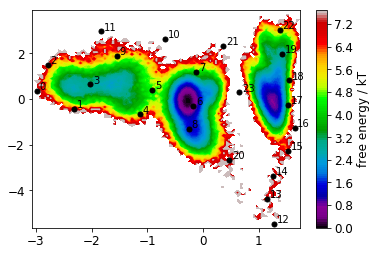

In [54]:
plt.figure()
pyemma.plots.plot_free_energy(np.vstack(Y)[:, 0], np.vstack(Y)[:, 1])
cc_x = clustering.clustercenters[:, 0]
cc_y = clustering.clustercenters[:, 1]
plt.plot(cc_x, cc_y, linewidth=0, marker='o', markersize=5, color='black')
plot_labels()

In [55]:
labels = clustering.dtrajs
mapping = defaultdict(lambda : [])
for i, label in enumerate(labels[0]):
    mapping[label].append(i)
for i in range(0,len(clustering.clustercenters)):
    print('size of cluster %d: %d structures' % (i, len(mapping[i])))

size of cluster 0: 290 structures
size of cluster 1: 197 structures
size of cluster 2: 32 structures
size of cluster 3: 402 structures
size of cluster 4: 315 structures
size of cluster 5: 7614 structures
size of cluster 6: 25113 structures
size of cluster 7: 5598 structures
size of cluster 8: 413 structures
size of cluster 9: 0 structures
size of cluster 10: 0 structures
size of cluster 11: 0 structures
size of cluster 12: 0 structures
size of cluster 13: 0 structures
size of cluster 14: 0 structures
size of cluster 15: 0 structures
size of cluster 16: 0 structures
size of cluster 17: 0 structures
size of cluster 18: 0 structures
size of cluster 19: 0 structures
size of cluster 20: 0 structures
size of cluster 21: 2 structures
size of cluster 22: 0 structures
size of cluster 23: 224 structures
